### Context
A significant number of hotel bookings are called off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:
1. Loss of resources (revenue) when the hotel cannot resell the room.
2. Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
3. Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
4. Human resources to make arrangements for the guests.

### Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. Star Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

### Key question 
Which factors have a high influence on booking cancellations ? 

### Dataset
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
* Not Selected – No meal plan selected
* Meal Plan 1 – Breakfast
* Meal Plan 2 – Half board (breakfast and one other meal)
* Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by Star Hotels Group
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.




### Import the necessary packages


In [ ]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Library to suppress warnings or deprecation notes
import warnings
warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To perform statistical analysis
import scipy.stats as stats

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    plot_confusion_matrix,
    make_scorer,
    roc_curve,
    roc_auc_score,
    precision_recall_curve
)

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression


In [2]:
data = pd.read_csv("../../data/StarHotelsGroup.csv")

<IPython.core.display.Javascript object>

In [3]:
# copying data to another varaible to avoid any changes to original data
booking = data.copy()

<IPython.core.display.Javascript object>

### View the first and last 5 rows of the dataset.

In [4]:

booking.head(5)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,3,0,0,3,Not Selected,0,Room_Type 1,277,2019,7,13,Online,0,0,0,89.10,2,Canceled


<IPython.core.display.Javascript object>

In [5]:
booking.tail(5)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
56921,2,1,0,1,Meal Plan 2,0,Room_Type 4,45,2019,6,15,Online,0,0,0,163.88,1,Not_Canceled
56922,2,0,1,1,Meal Plan 1,0,Room_Type 1,320,2019,5,15,Offline,0,0,0,90.00,1,Canceled
56923,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
56924,2,0,2,2,Not Selected,0,Room_Type 1,6,2019,4,28,Online,0,0,0,162.50,2,Not_Canceled
56925,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


<IPython.core.display.Javascript object>

### Understand the shape of the dataset.

In [6]:
# checking the shape of the data
print(f"There are {booking.shape[0]} rows and {booking.shape[1]} columns.")  # f-string

There are 56926 rows and 18 columns.


<IPython.core.display.Javascript object>

## Let's check the duplicate data. And if any, we should remove it.

In [7]:
booking[booking.duplicated()].count()

no_of_adults                            14350
no_of_children                          14350
no_of_weekend_nights                    14350
no_of_week_nights                       14350
type_of_meal_plan                       14350
required_car_parking_space              14350
room_type_reserved                      14350
lead_time                               14350
arrival_year                            14350
arrival_month                           14350
arrival_date                            14350
market_segment_type                     14350
repeated_guest                          14350
no_of_previous_cancellations            14350
no_of_previous_bookings_not_canceled    14350
avg_price_per_room                      14350
no_of_special_requests                  14350
booking_status                          14350
dtype: int64

<IPython.core.display.Javascript object>

* There are 14350 duplicate values in the dataset

### Let's drop the duplicate values

In [8]:
booking.drop_duplicates(inplace=True)

<IPython.core.display.Javascript object>

### Get the information about the dataset

In [9]:
# checking column datatypes and number of non-null values
booking.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42576 entries, 0 to 56924
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          42576 non-null  int64  
 1   no_of_children                        42576 non-null  int64  
 2   no_of_weekend_nights                  42576 non-null  int64  
 3   no_of_week_nights                     42576 non-null  int64  
 4   type_of_meal_plan                     42576 non-null  object 
 5   required_car_parking_space            42576 non-null  int64  
 6   room_type_reserved                    42576 non-null  object 
 7   lead_time                             42576 non-null  int64  
 8   arrival_year                          42576 non-null  int64  
 9   arrival_month                         42576 non-null  int64  
 10  arrival_date                          42576 non-null  int64  
 11  market_segment_

<IPython.core.display.Javascript object>

### Insights:

- Most of the data-types are either **int64** or **float64**.
- type_of_meal_plan,room_type_reserved,market_segment_type and booking_status are having data-types as an **object**, this means we need to convert these into suitable  data-type before we feed our data into the model.



### Check for missing values

In [10]:
booking.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

<IPython.core.display.Javascript object>

* There are no missing values in the data.

### Summary of the dataset

In [11]:
booking.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
no_of_adults,42576.0,NaN,NaN,NaN,1.916737,0.527524,0.0,2.0,2.0,2.0,4.0
no_of_children,42576.0,NaN,NaN,NaN,0.142146,0.45992,0.0,0.0,0.0,0.0,10.0
no_of_weekend_nights,42576.0,NaN,NaN,NaN,0.89527,0.887864,0.0,0.0,1.0,2.0,8.0
no_of_week_nights,42576.0,NaN,NaN,NaN,2.321167,1.519328,0.0,1.0,2.0,3.0,17.0
type_of_meal_plan,42576,4,Meal Plan 1,31863,NaN,NaN,NaN,NaN,NaN,NaN,NaN
required_car_parking_space,42576.0,NaN,NaN,NaN,0.034362,0.18216,0.0,0.0,0.0,0.0,1.0
room_type_reserved,42576,7,Room_Type 1,29730,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lead_time,42576.0,NaN,NaN,NaN,77.315953,77.279616,0.0,16.0,53.0,118.0,521.0
arrival_year,42576.0,NaN,NaN,NaN,2018.297891,0.626126,2017.0,2018.0,2018.0,2019.0,2019.0
arrival_month,42576.0,NaN,NaN,NaN,6.365488,3.051924,1.0,4.0,6.0,9.0,12.0


<IPython.core.display.Javascript object>

**Observations-**  
- There are 4 types of meal plans
- There are 7 types of room types
- There are 5 types of market segment type



In [12]:
cat_columns = ["type_of_meal_plan", "room_type_reserved", "market_segment_type", "booking_status"]
for i in cat_columns:
    print(data[i].value_counts())
    print("*" * 50)

Meal Plan 1     42330
Not Selected    10072
Meal Plan 2      4516
Meal Plan 3         8
Name: type_of_meal_plan, dtype: int64
**************************************************
Room_Type 1    42807
Room_Type 4    10413
Room_Type 6     1581
Room_Type 5      983
Room_Type 2      823
Room_Type 7      312
Room_Type 3        7
Name: room_type_reserved, dtype: int64
**************************************************
Online           39490
Offline          13875
Corporate         2796
Complementary      536
Aviation           229
Name: market_segment_type, dtype: int64
**************************************************
Not_Canceled    35378
Canceled        21548
Name: booking_status, dtype: int64
**************************************************


<IPython.core.display.Javascript object>

* Meal Plan 1 is mostly selected, Also 10072 bookings not selected for any meal plans. 
* Room_Type 1 is highest slected among bookings 42807. 
* Room_Type 3 is least selected among bookings. 
* Highest market_segment type is through online booking.
* 35378 bookings are not cancelled vs 21548 Cancelled. 





In [13]:
## Unique values in the columns
columns = [
    "no_of_adults",
    "no_of_children",
    "no_of_weekend_nights",
    "no_of_week_nights",
    "arrival_year",
    "arrival_month",
    "repeated_guest",
    "room_type_reserved",
    "type_of_meal_plan",
    "market_segment_type",
    "no_of_previous_cancellations",
    "no_of_previous_bookings_not_canceled",
    "no_of_special_requests",
    "booking_status"
]
#Print frequency of categories
for col in columns:
    print ('\nUnique values for %s'%col)
    print (booking[col].nunique())
    


Unique values for no_of_adults
5

Unique values for no_of_children
6

Unique values for no_of_weekend_nights
9

Unique values for no_of_week_nights
18

Unique values for arrival_year
3

Unique values for arrival_month
12

Unique values for repeated_guest
2

Unique values for room_type_reserved
7

Unique values for type_of_meal_plan
4

Unique values for market_segment_type
5

Unique values for no_of_previous_cancellations
9

Unique values for no_of_previous_bookings_not_canceled
73

Unique values for no_of_special_requests
6

Unique values for booking_status
2


<IPython.core.display.Javascript object>

### EDA

### Univariate analysis

In [14]:
# function to plot a boxplot and a histogram along the same scale.

def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

<Figure size 504x288 with 0 Axes>

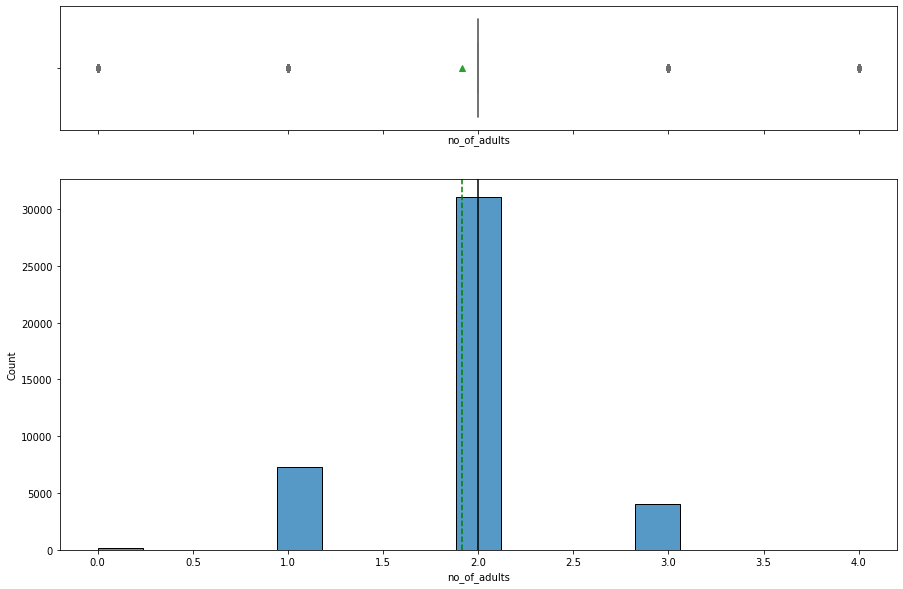

<Figure size 504x288 with 0 Axes>

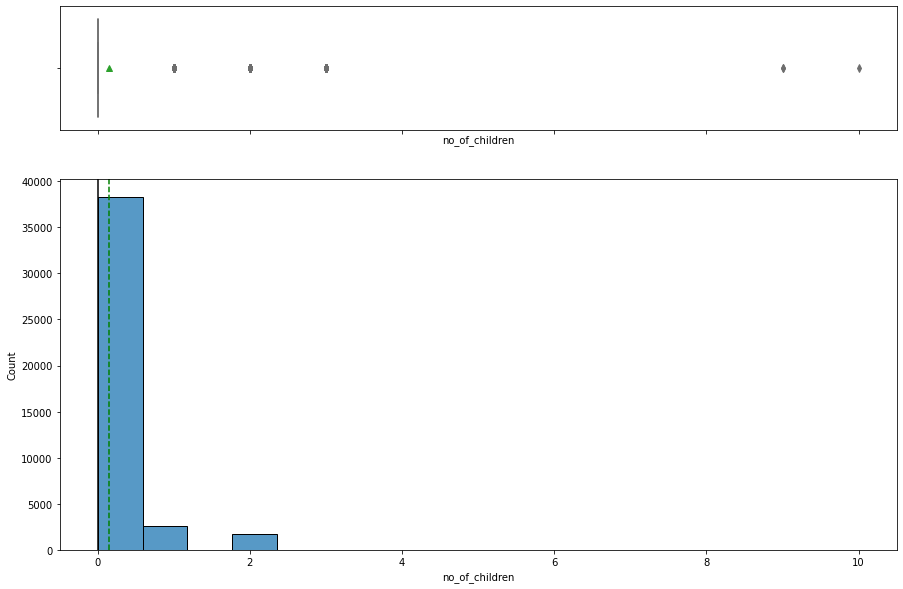

<Figure size 504x288 with 0 Axes>

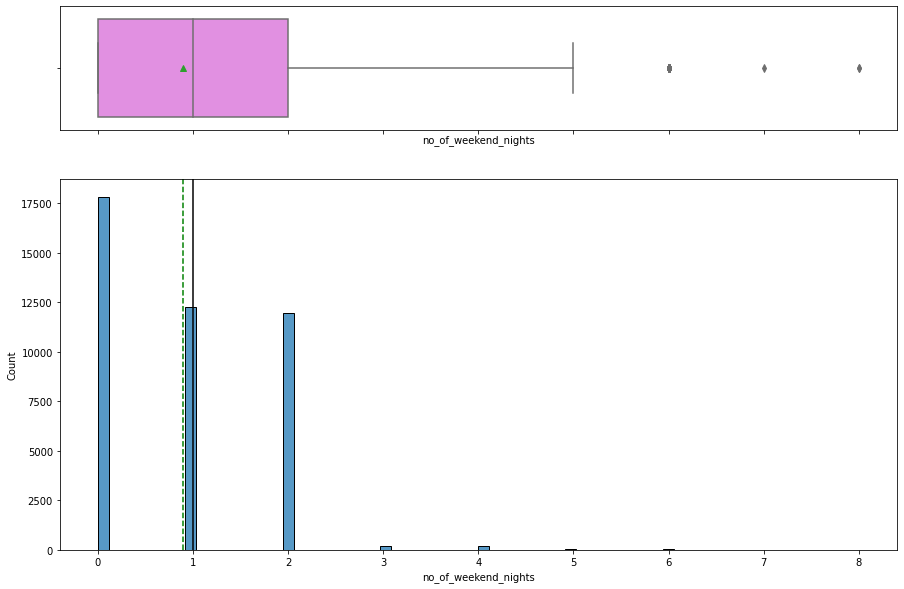

<Figure size 504x288 with 0 Axes>

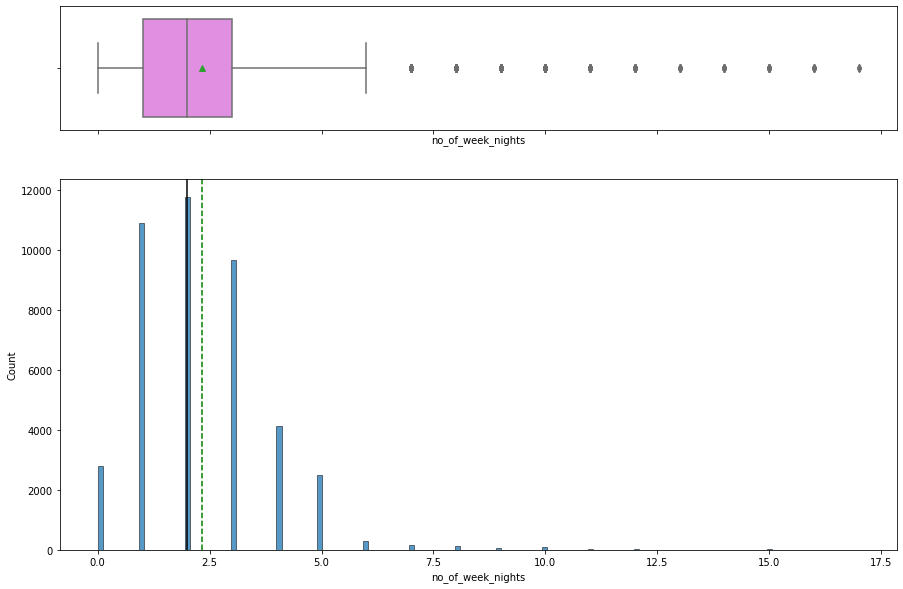

<Figure size 504x288 with 0 Axes>

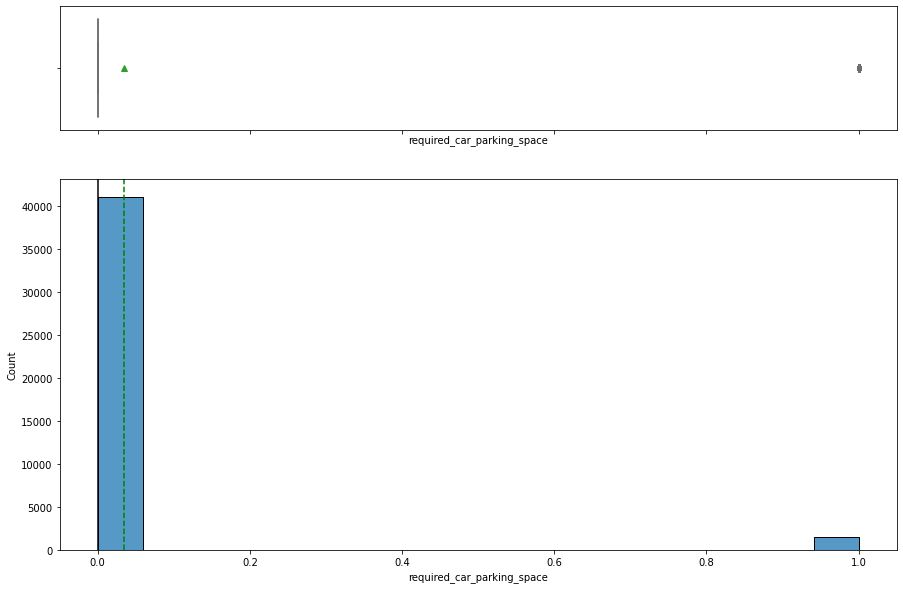

<Figure size 504x288 with 0 Axes>

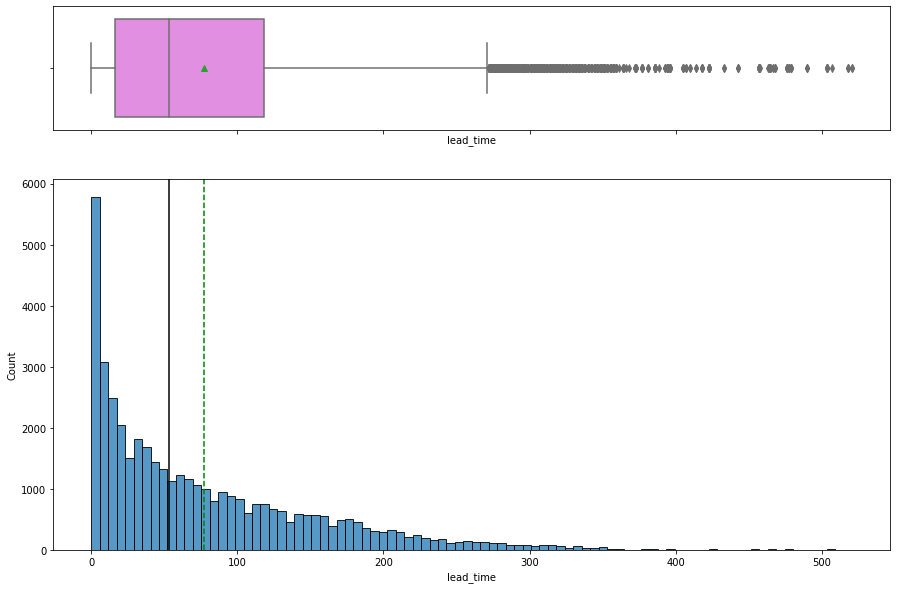

<Figure size 504x288 with 0 Axes>

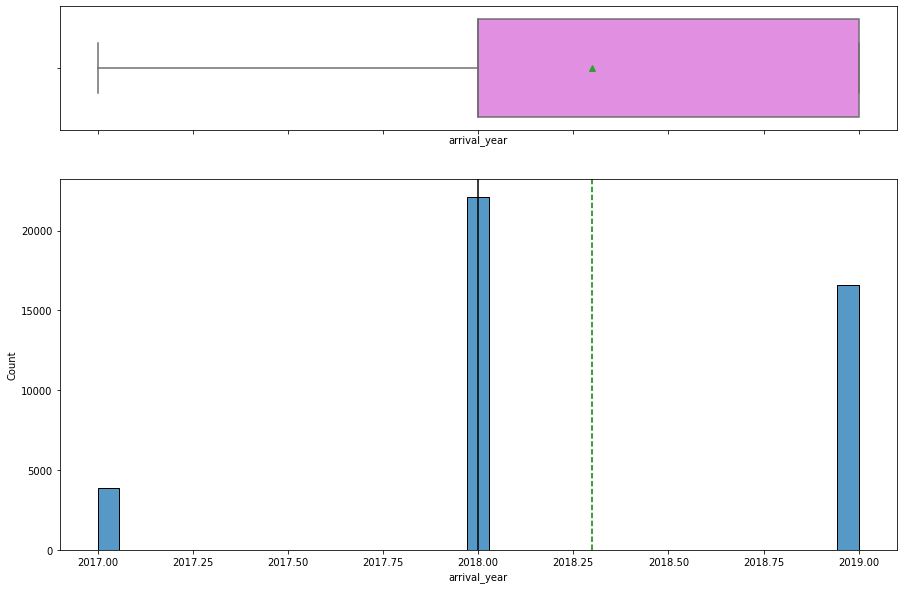

<Figure size 504x288 with 0 Axes>

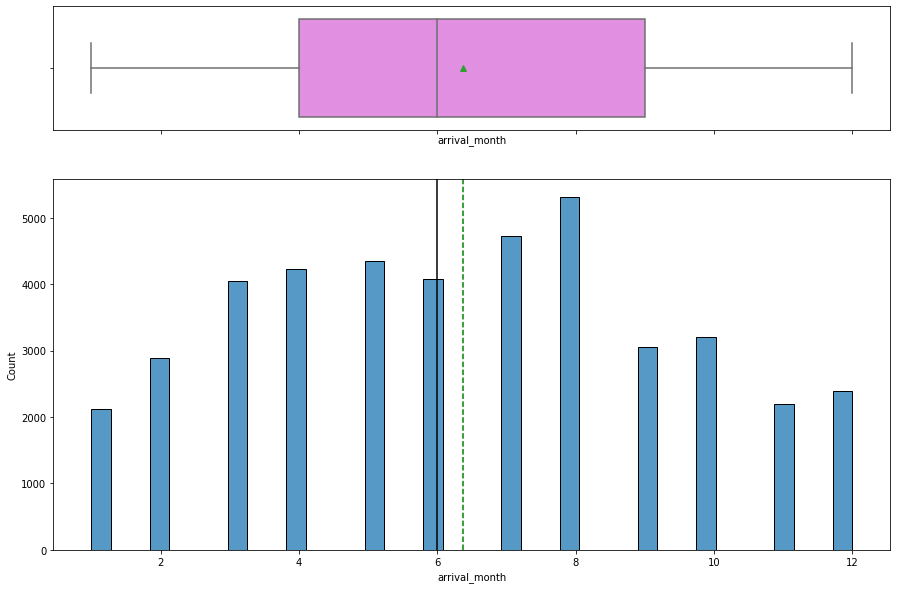

<Figure size 504x288 with 0 Axes>

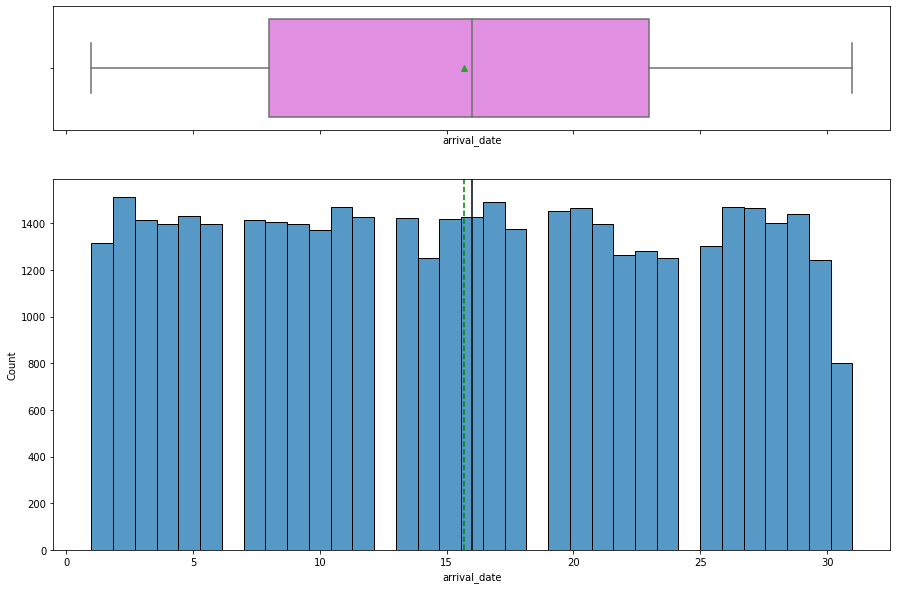

<Figure size 504x288 with 0 Axes>

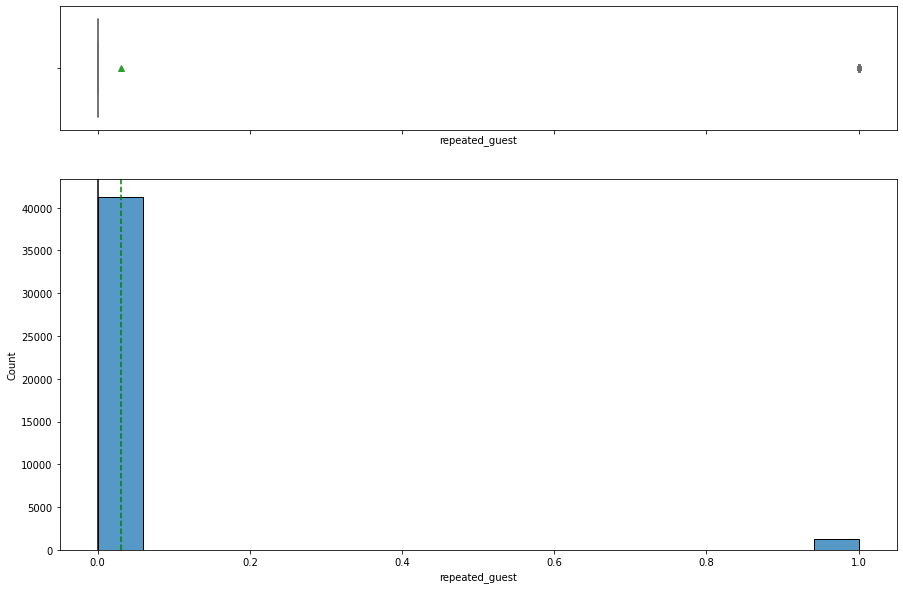

<Figure size 504x288 with 0 Axes>

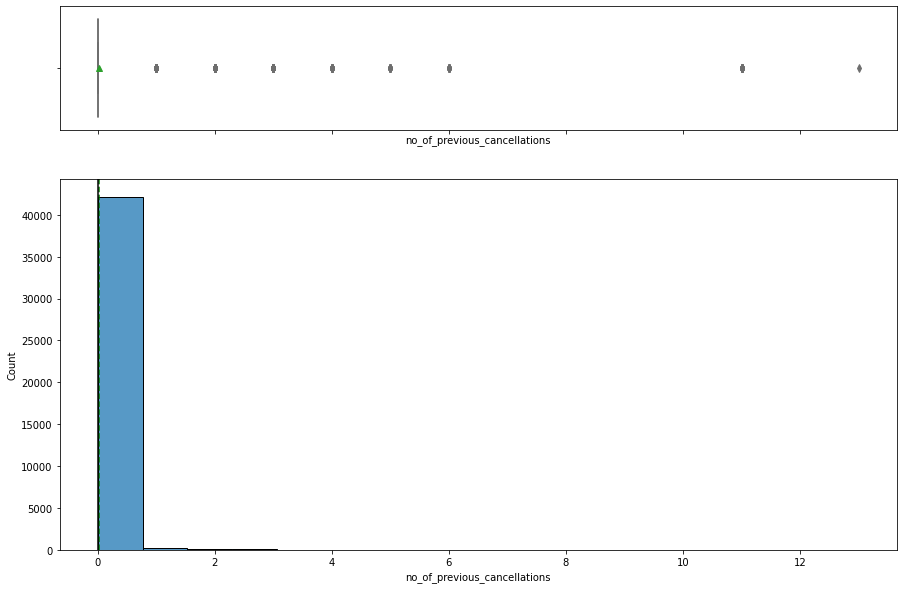

<Figure size 504x288 with 0 Axes>

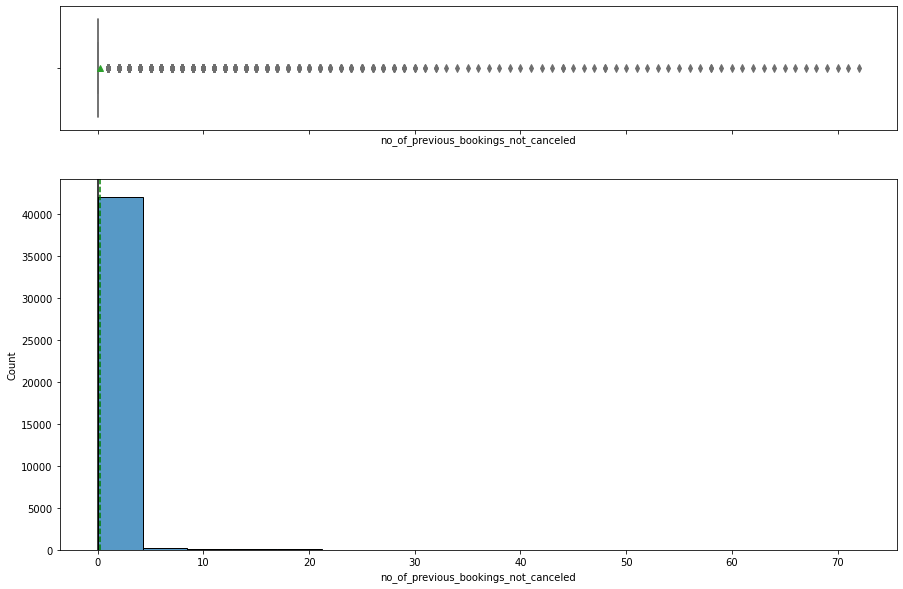

<Figure size 504x288 with 0 Axes>

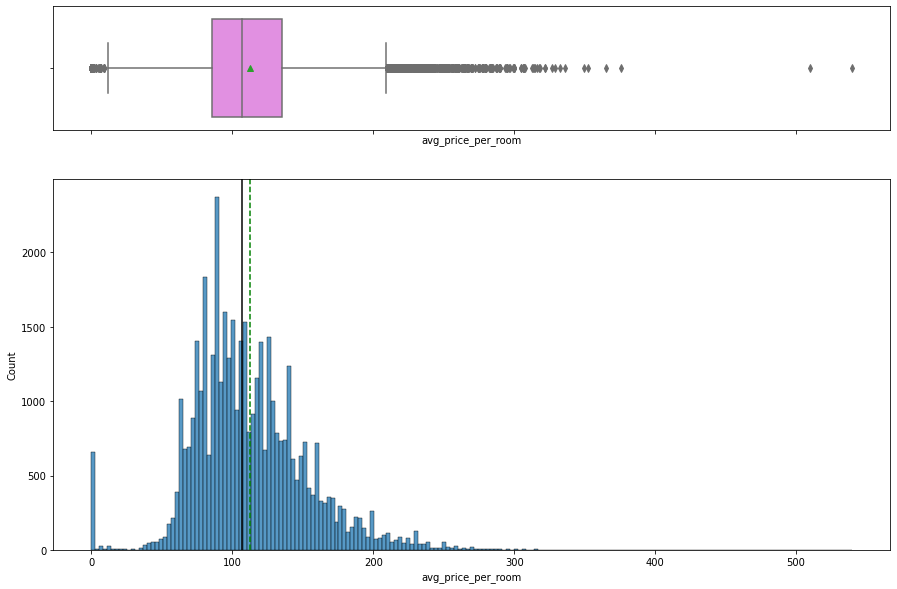

<Figure size 504x288 with 0 Axes>

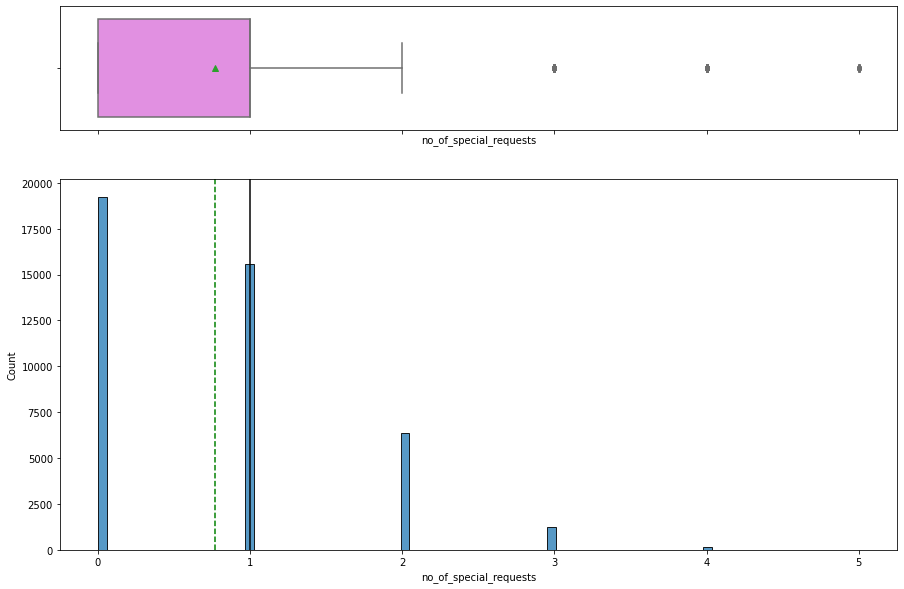

<IPython.core.display.Javascript object>

In [15]:
for column in booking.columns[booking.dtypes != 'object']:
    plt.figure(figsize=(7, 4))
    histogram_boxplot(booking, column)
    plt.show()

### Observations 
- There are outliers exists in the lead time
- lead_time is right skewed.
- There are outliers exists in avg_price_per_room
- avg_price_per_room is also right skewed. 
- average nightly price is 112.37


In [16]:
# function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

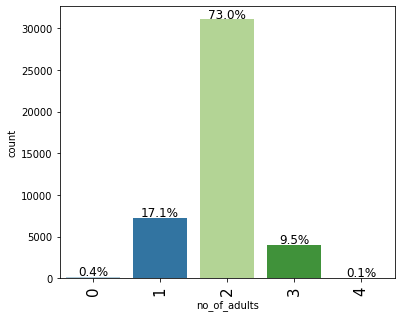

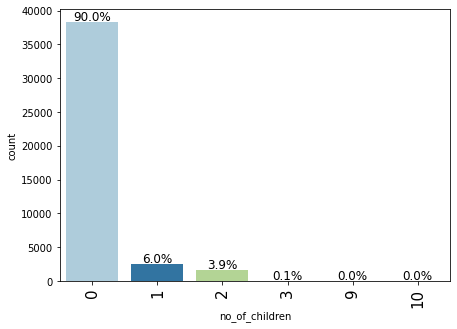

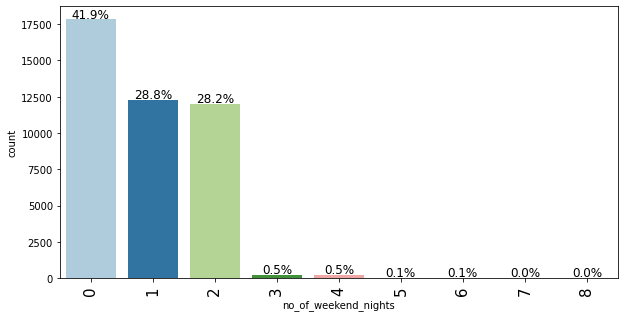

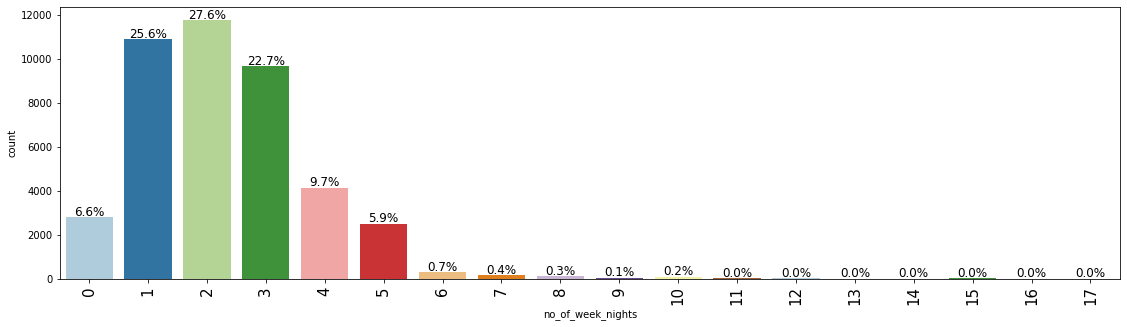

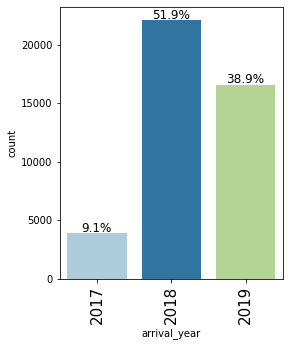

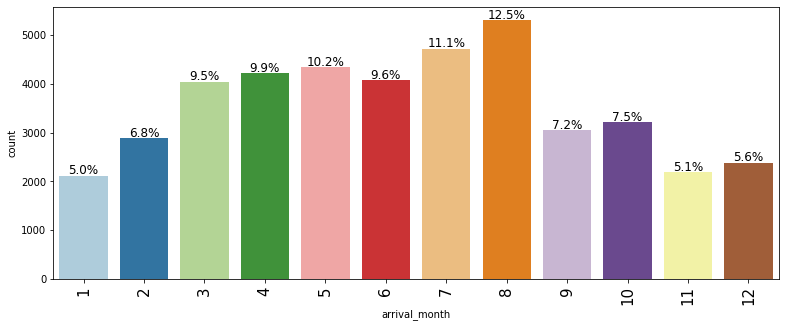

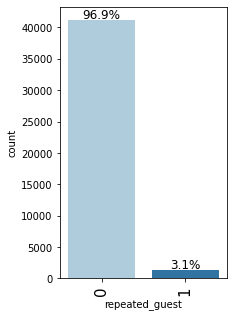

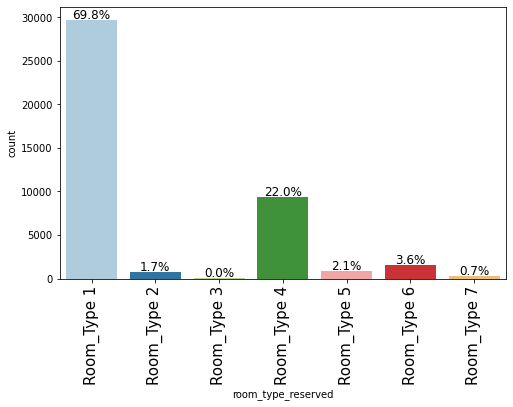

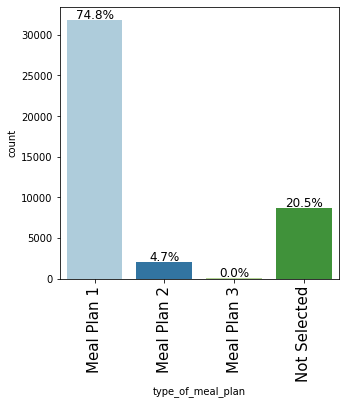

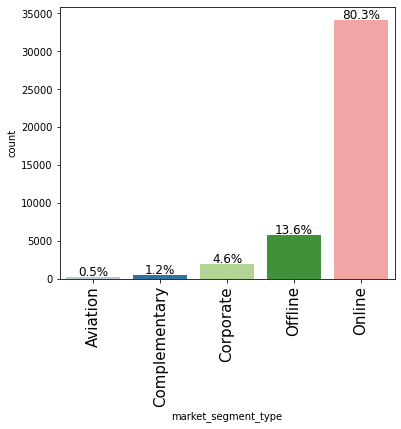

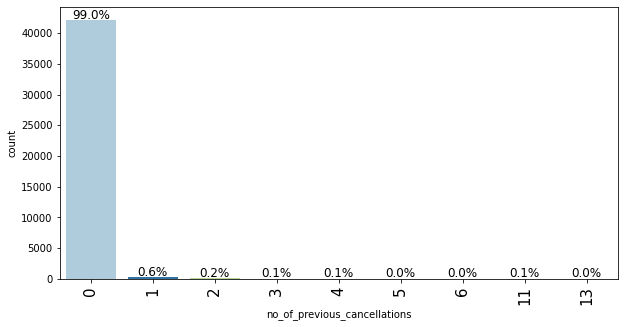

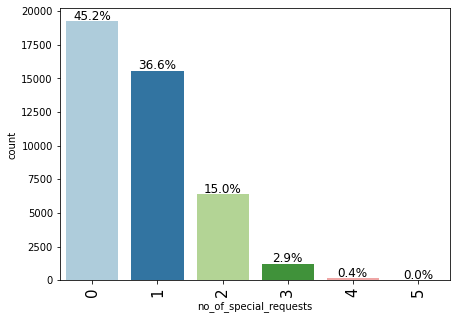

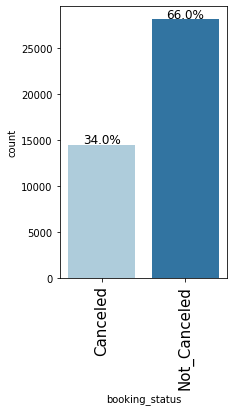

<IPython.core.display.Javascript object>

In [17]:
# CReating barplot for all numerical columns for univariate analysis. 
numerical_columns = [
    "no_of_adults",
    "no_of_children",
    "no_of_weekend_nights",
    "no_of_week_nights",
    "arrival_year",
    "arrival_month",
    "repeated_guest",
    "room_type_reserved",
    "type_of_meal_plan",
    "market_segment_type",
    "no_of_previous_cancellations",
    "no_of_special_requests",
    "booking_status"
]

for i in numerical_columns:
    labeled_barplot(booking, i, perc=True)

    

### Observations 
- 73% of the booking is done where occupents are 2 adults in the room
- 90% room booked with by the occupents with no kids.
- 41% time week ends nights are not booked. 
- weekends nights occupency for 1 night and 2 nights both are 28.8% and 28.2%
- highest occupency are for 2 weeknights which is 27.6% followed by 1 night which is 25.6%
- 2018 and 2019 were among the busiest year with 51.9% and 38.9% arrivals. 
- July and August are busiest months with 11.1% and 12.5% arrivals.
- 96.9% guest were not a repeated guest only 3.1% guest were repeated guest. 
- Out of 7 catagories room types, Room catagory type 4 has highest booking.
- 74.8% customers selected meal plan 1 and 20.5% customers did not selected any meal plan.
- 80.3 % bookins is done through online. 
- 36% guest has some special request
- 66% customers not cancelled the booking v/s 34% customers cancelled. 

## Bivariate Analysis

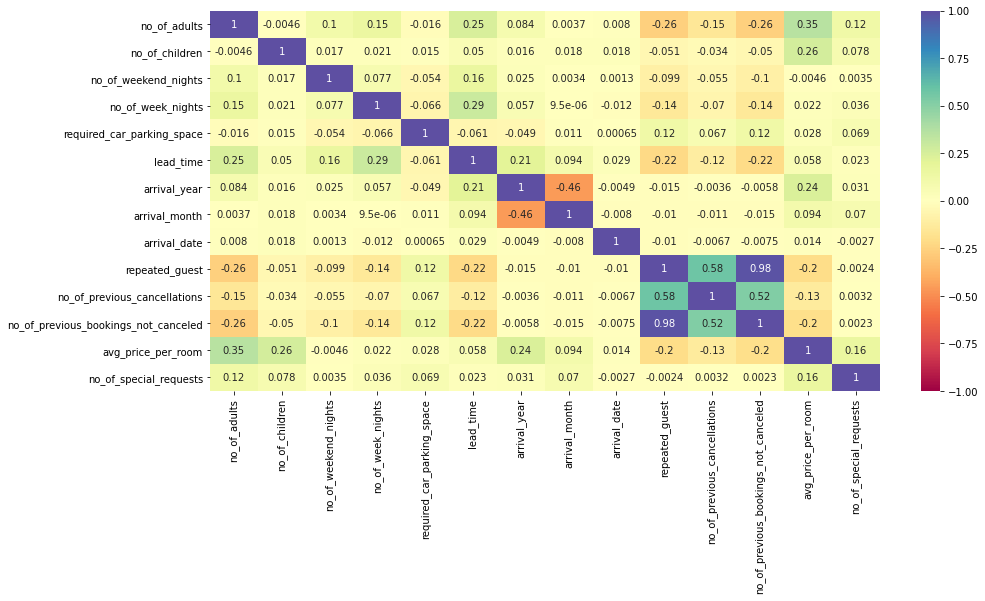

<IPython.core.display.Javascript object>

In [18]:
plt.figure(figsize=(15, 7))
sns.heatmap(booking.corr(method="spearman"), annot=True, vmin=-1, vmax=1, cmap="Spectral")
plt.show()

### Observation 
- no_of_repeated_guests is highly co-related with no_of_previous_bookings_not cancelled  


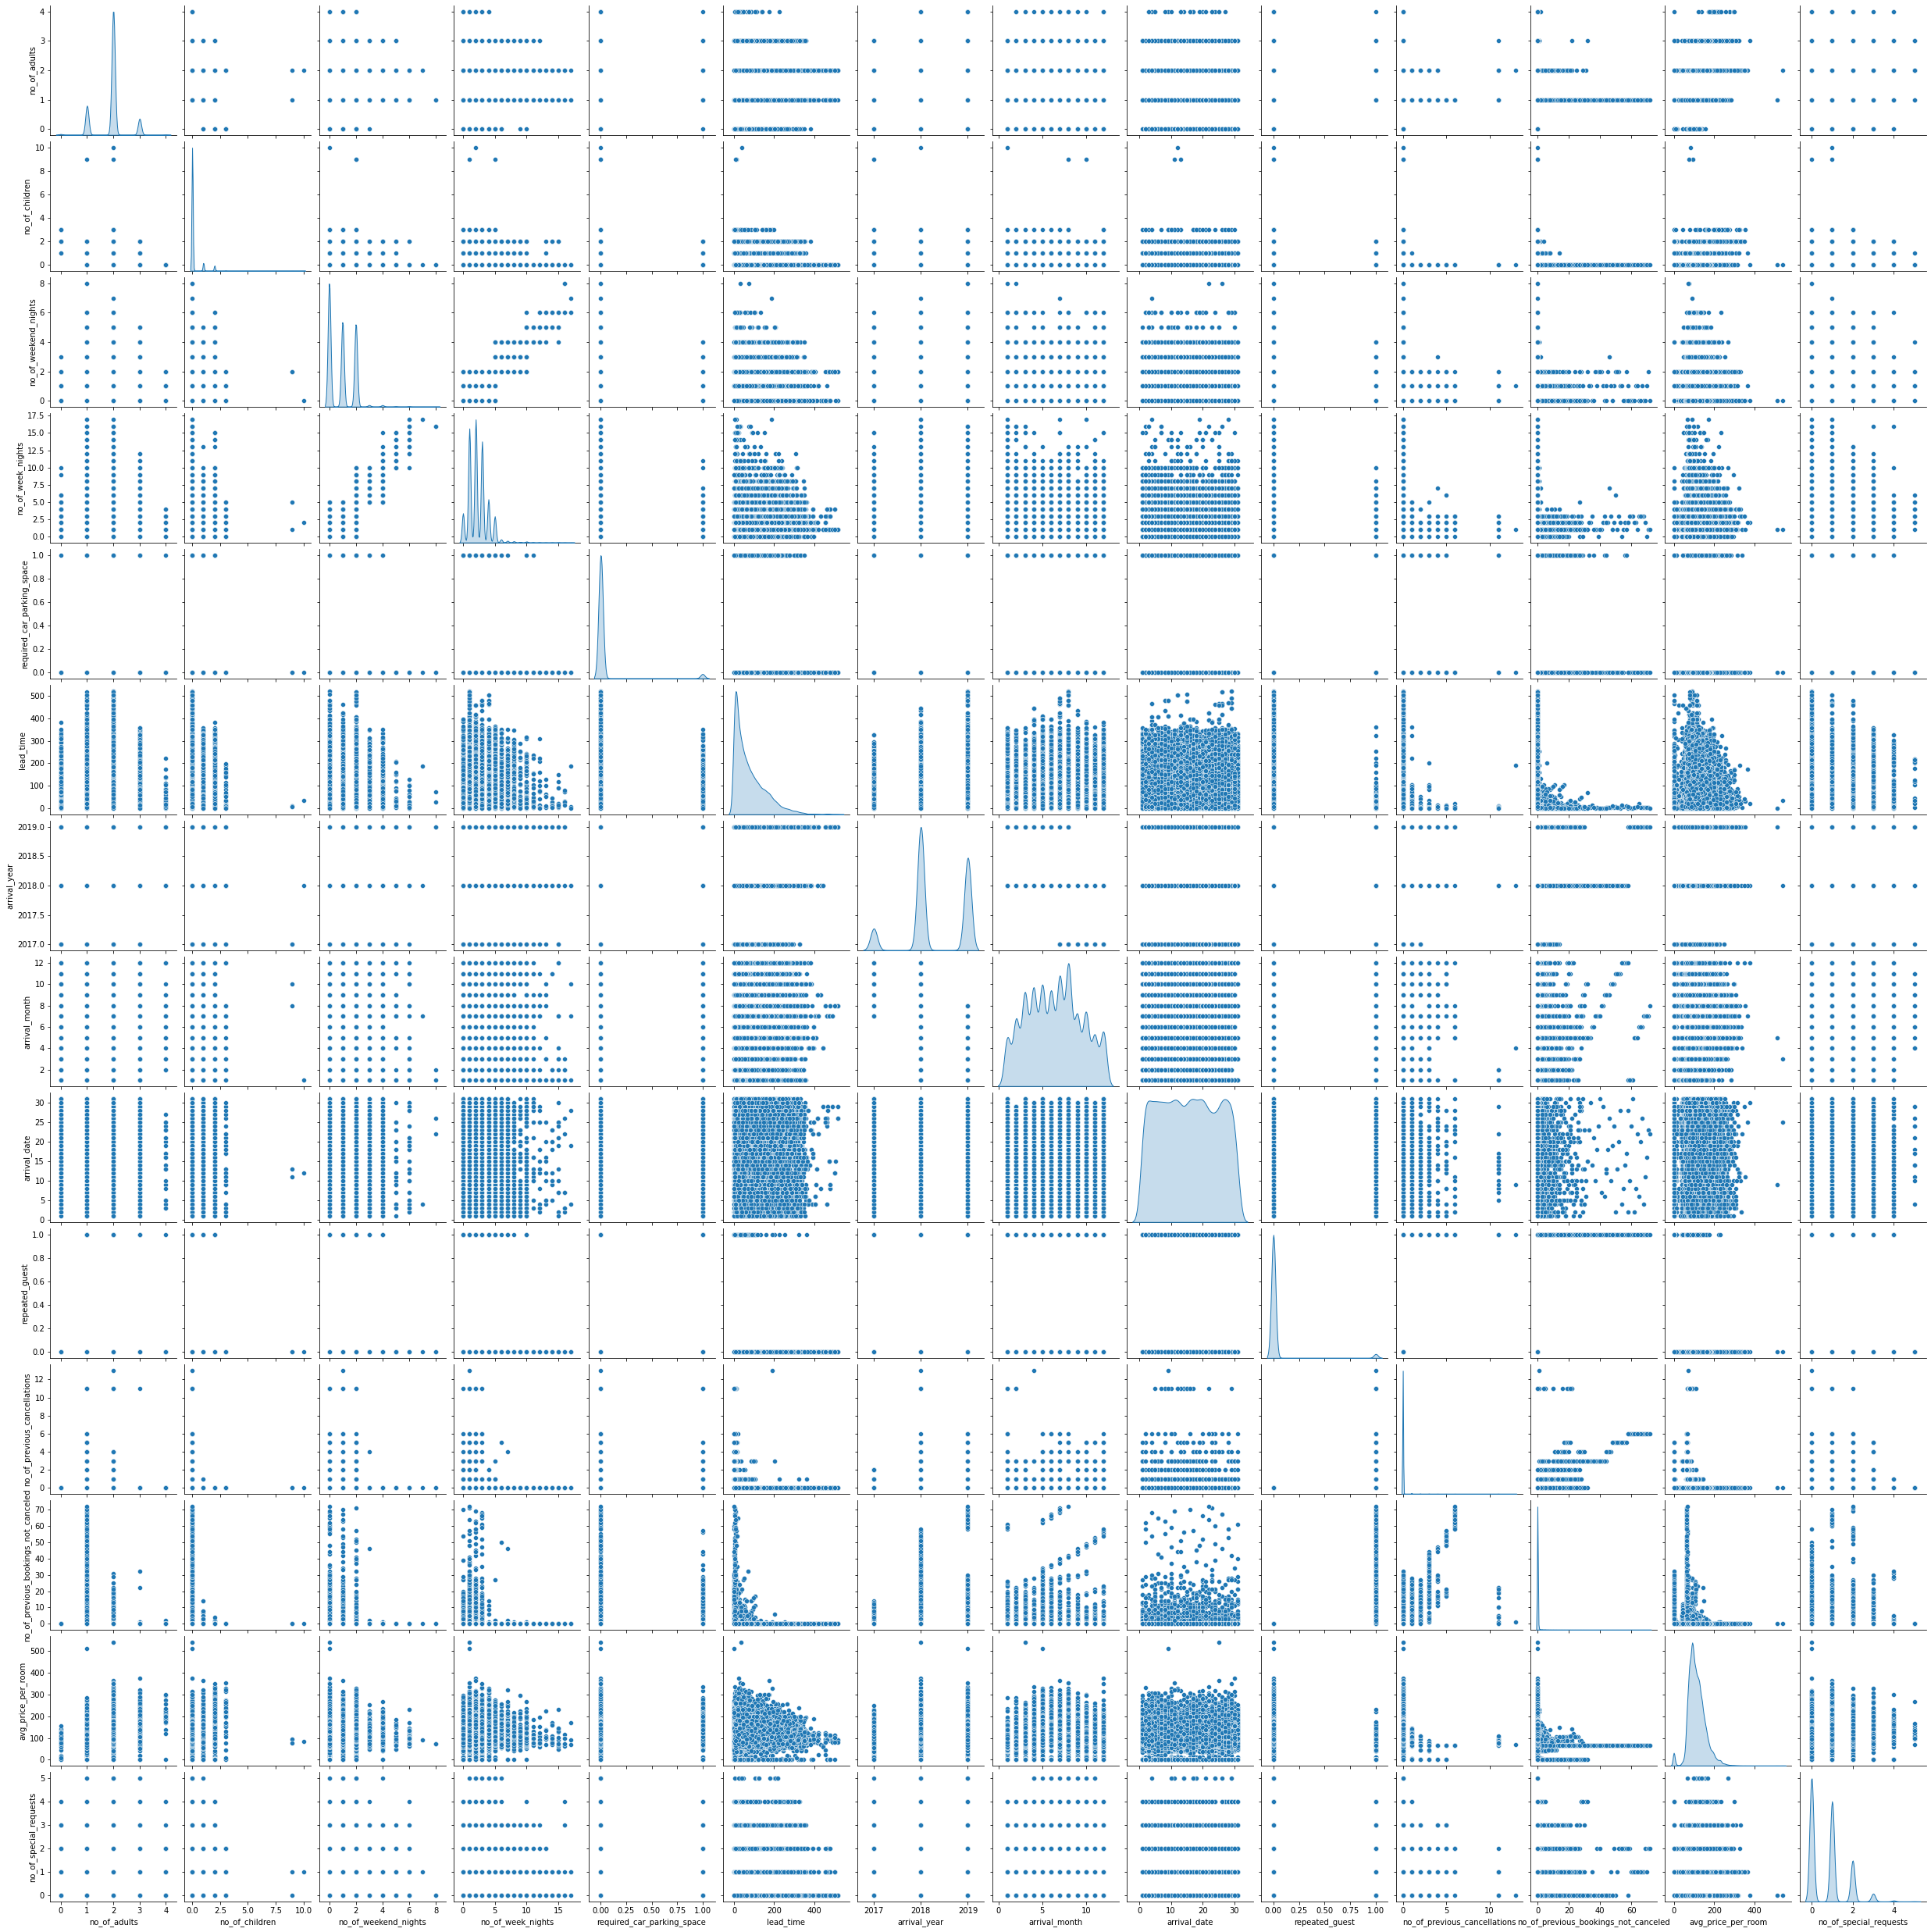

<IPython.core.display.Javascript object>

In [19]:
# Pair plot
sns.pairplot(booking,diag_kind='kde')

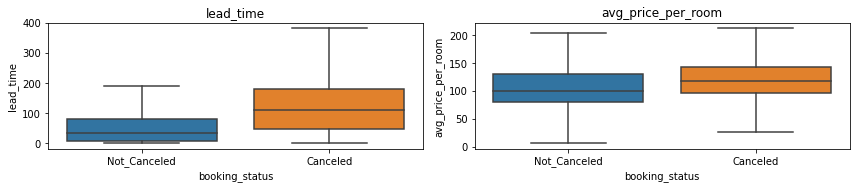

<IPython.core.display.Javascript object>

In [20]:
cols = data[["lead_time","avg_price_per_room"]].columns.tolist()

plt.figure(figsize=(12, 7))

for i, variable in enumerate(cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(booking["booking_status"], booking[variable], showfliers=False)
    plt.tight_layout()
    plt.title(variable)
plt.show()



In [21]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

booking_status  Canceled  Not_Canceled    All
no_of_adults                                 
All                14487         28089  42576
2                  10998         20071  31069
3                   1813          2218   4031
1                   1589          5675   7264
0                     76           108    184
4                     11            17     28
------------------------------------------------------------------------------------------------------------------------


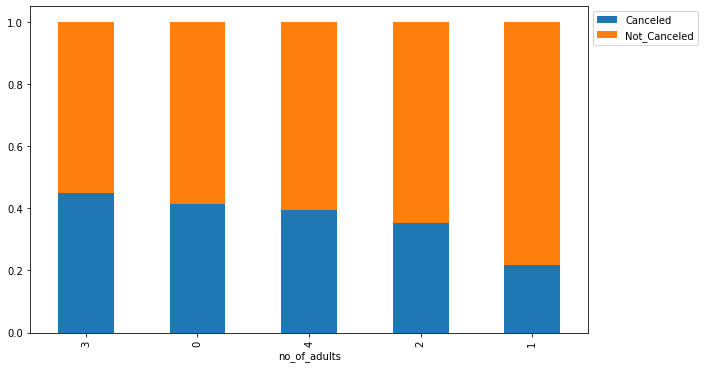

booking_status  Canceled  Not_Canceled    All
no_of_children                               
All                14487         28089  42576
0                  12580         25720  38300
1                   1009          1552   2561
2                    883           790   1673
3                     14            25     39
9                      1             1      2
10                     0             1      1
------------------------------------------------------------------------------------------------------------------------


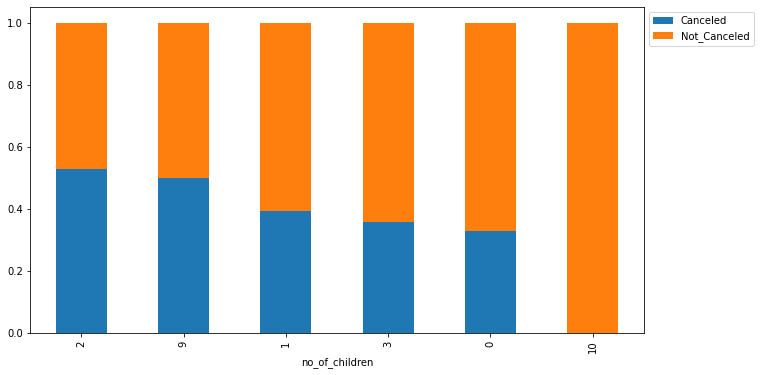

booking_status        Canceled  Not_Canceled    All
no_of_weekend_nights                               
All                      14487         28089  42576
0                         5630         12199  17829
2                         4417          7570  11987
1                         4130          8130  12260
4                          148            68    216
3                          117           103    220
5                           21             9     30
6                           21            10     31
8                            2             0      2
7                            1             0      1
------------------------------------------------------------------------------------------------------------------------


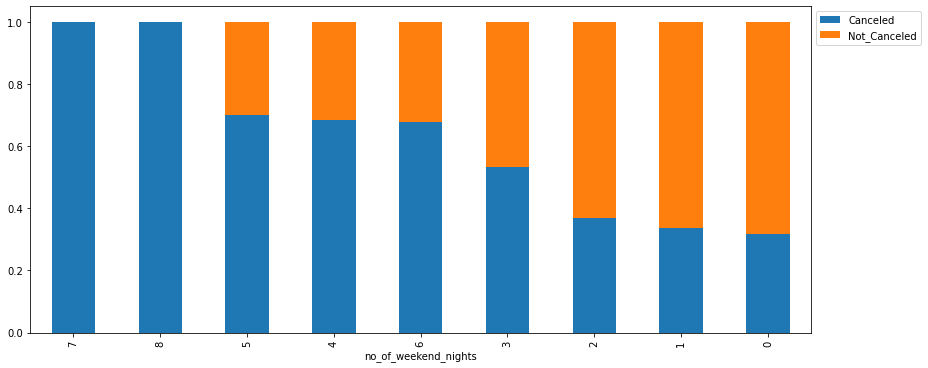

booking_status     Canceled  Not_Canceled    All
no_of_week_nights                               
All                   14487         28089  42576
2                      3979          7785  11764
3                      3483          6177   9660
1                      3038          7868  10906
4                      1704          2432   4136
5                      1104          1401   2505
0                       691          2106   2797
6                       161           140    301
7                        90            75    165
10                       79            15     94
8                        74            47    121
9                        29            19     48
11                       17             3     20
12                       11             5     16
15                        8             6     14
13                        7             2      9
14                        5             5     10
16                        5             2      7
17                  

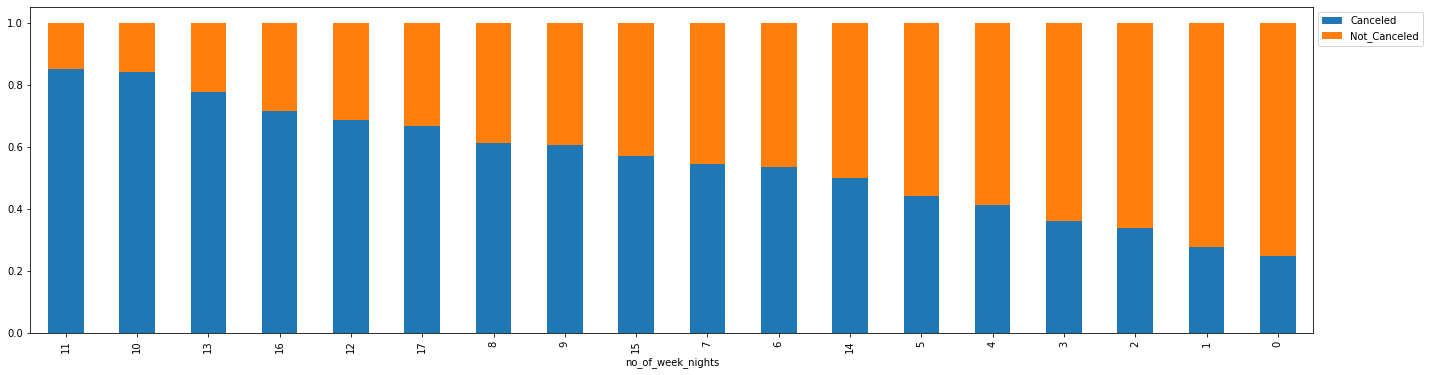

booking_status  Canceled  Not_Canceled    All
arrival_year                                 
All                14487         28089  42576
2019                7045          9531  16576
2018                6966         15141  22107
2017                 476          3417   3893
------------------------------------------------------------------------------------------------------------------------


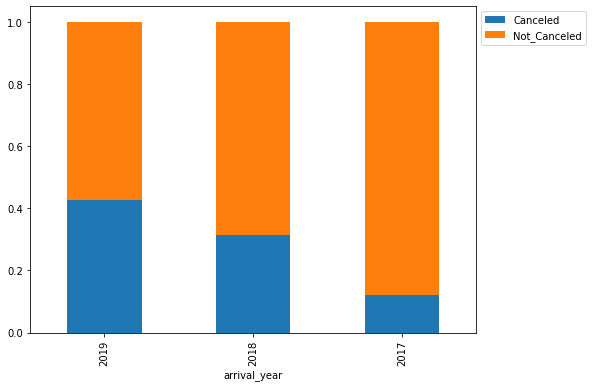

booking_status  Canceled  Not_Canceled    All
arrival_month                                
All                14487         28089  42576
8                   2475          2837   5312
7                   2240          2485   4725
5                   1674          2674   4348
4                   1627          2600   4227
6                   1584          2489   4073
3                   1195          2849   4044
10                   918          2291   3209
9                    888          2169   3057
2                    796          2093   2889
11                   496          1696   2192
12                   340          2045   2385
1                    254          1861   2115
------------------------------------------------------------------------------------------------------------------------


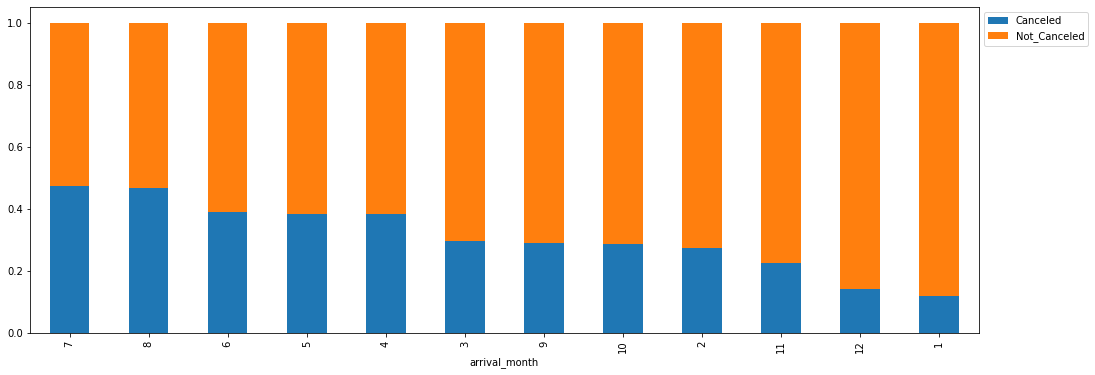

booking_status  Canceled  Not_Canceled    All
repeated_guest                               
All                14487         28089  42576
0                  14477         26784  41261
1                     10          1305   1315
------------------------------------------------------------------------------------------------------------------------


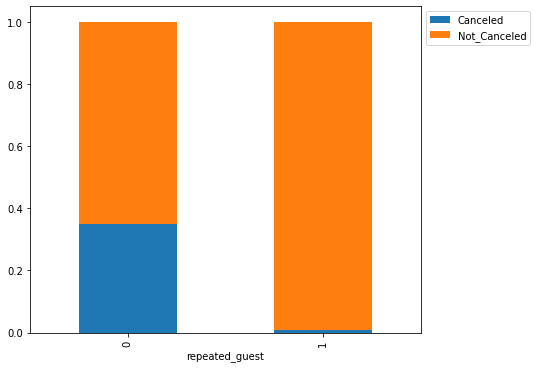

booking_status      Canceled  Not_Canceled    All
room_type_reserved                               
All                    14487         28089  42576
Room_Type 1             9225         20505  29730
Room_Type 4             3683          5686   9369
Room_Type 6              826           714   1540
Room_Type 5              367           539    906
Room_Type 2              274           444    718
Room_Type 7              110           197    307
Room_Type 3                2             4      6
------------------------------------------------------------------------------------------------------------------------


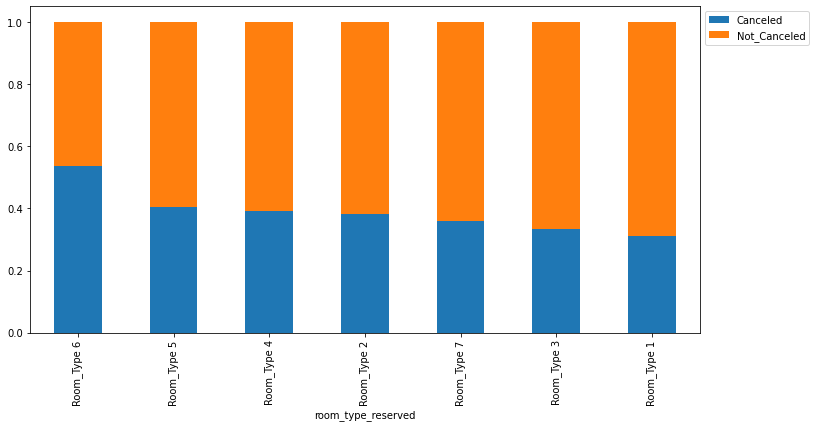

booking_status     Canceled  Not_Canceled    All
type_of_meal_plan                               
All                   14487         28089  42576
Meal Plan 1           10511         21352  31863
Not Selected           3118          5598   8716
Meal Plan 2             857          1132   1989
Meal Plan 3               1             7      8
------------------------------------------------------------------------------------------------------------------------


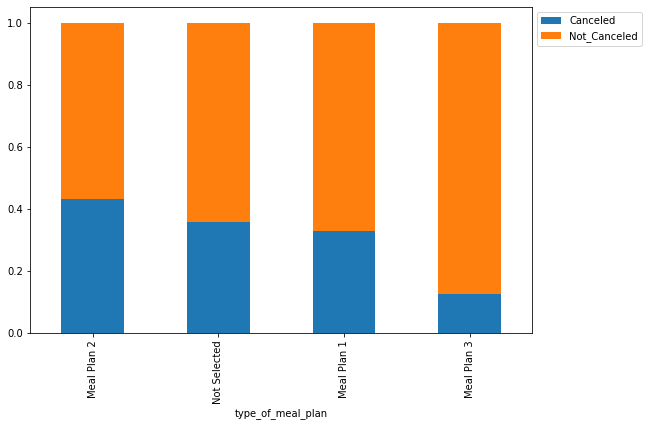

booking_status       Canceled  Not_Canceled    All
market_segment_type                               
All                     14487         28089  42576
Online                  13483         20686  34169
Offline                   804          4973   5777
Corporate                 167          1772   1939
Aviation                   33           162    195
Complementary               0           496    496
------------------------------------------------------------------------------------------------------------------------


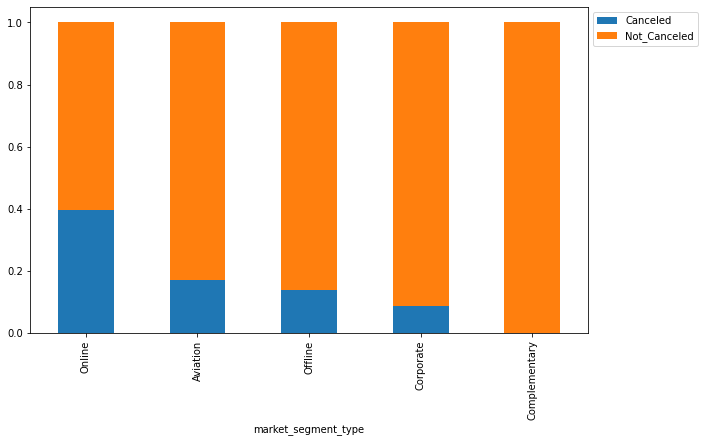

booking_status                Canceled  Not_Canceled    All
no_of_previous_cancellations                               
All                              14487         28089  42576
0                                14477         27655  42132
1                                    8           241    249
3                                    1            46     47
13                                   1             0      1
2                                    0            66     66
4                                    0            24     24
5                                    0            16     16
6                                    0            16     16
11                                   0            25     25
------------------------------------------------------------------------------------------------------------------------


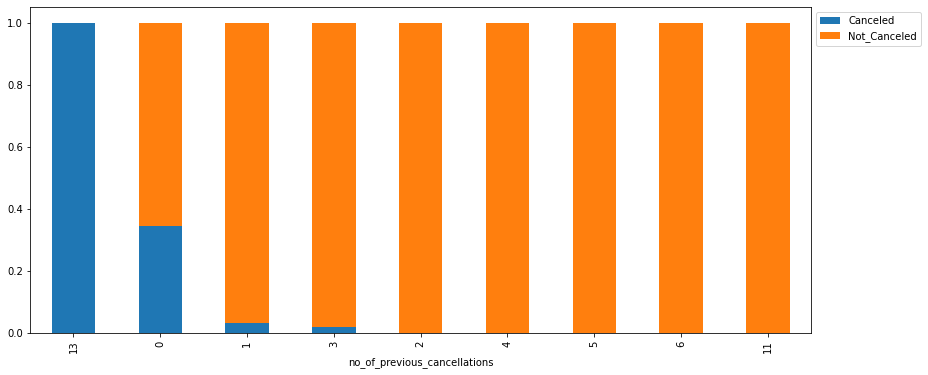

booking_status          Canceled  Not_Canceled    All
no_of_special_requests                               
All                        14487         28089  42576
0                           8752         10476  19228
1                           4346         11225  15571
2                           1389          4992   6381
3                              0          1230   1230
4                              0           150    150
5                              0            16     16
------------------------------------------------------------------------------------------------------------------------


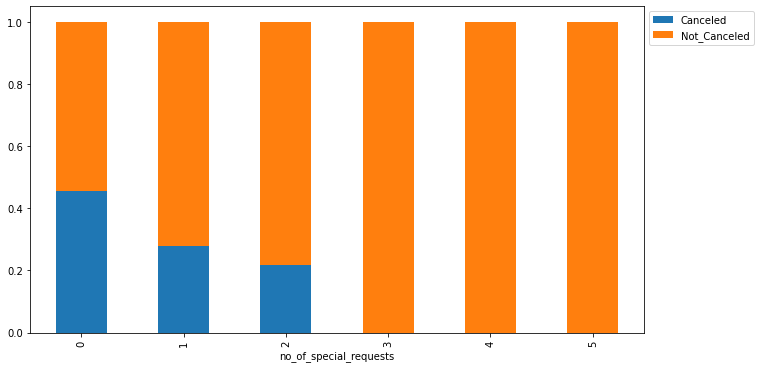

<IPython.core.display.Javascript object>

In [22]:
# Stacked Bar plots Bivariatenuniquenalysis with booking status
numerical_columns = [
    "no_of_adults",
    "no_of_children",
    "no_of_weekend_nights",
    "no_of_week_nights",
    "arrival_year",
    "arrival_month",
    "repeated_guest",
    "room_type_reserved",
    "type_of_meal_plan",
    "market_segment_type",
    "no_of_previous_cancellations",    
    "no_of_special_requests"
    
]
for column in numerical_columns :
    stacked_barplot(booking, column, "booking_status")

### <a id='link1'>Summary of EDA</a>
**Data Description:**
- There are 56926 rows and 18 columns.
- There are 14350 duplicate values in the dataset 
- Most of the data-types are either int64 or float64.
- type_of_meal_plan,room_type_reserved,market_segment_type and booking_status are having data-types as an object,this means we need to convert these into suitable data-type before we feed our data into the model.
- There are no missing values in the data.

**Observations from EDA:**
- There are 4 types of meal plans
- There are 7 types of room types
- There are 5 types of market segment type
- Meal Plan 1 is mostly selected, Also 10072 bookings not selected for any meal plans.
- Room_Type 1 is highest slected among bookings 42807.
- Room_Type 3 is least selected among bookings.
- Highest market_segment type is through online booking.
- 35378 bookings are not cancelled vs 21548 Cancelled.
- There are outliers exists in the lead time
- lead_time is right skewed.
- There are outliers exists in avg_price_per_room
- avg_price_per_room is also right skewed.
- Average nightly price is 112.37
- 73% of the booking is done where occupents are 2 adults in the room
- 90% room booked with by the occupents with no kids.
- 41% time week ends nights are not booked.
- weekends nights occupency for 1 night and 2 nights both are 28.8% and 28.2%
- highest occupency are for 2 weeknights which is 27.6% followed by 1 night which is 25.6%
- 2018 and 2019 were among the busiest year with 51.9% and 38.9% arrivals.
- July and August are busiest months with 11.1% and 12.5% arrivals.
- 96.9% guest were not a repeated guest only 3.1% guest were repeated guest.
- Out of 7 catagories room types, Room catagory type 4 has highest booking.
- 74.8% customers selected meal plan 1 and 20.5% customers did not selected any meal plan.
- 80.3 % bookins is done through online.
- 36% guest has some special request
- 66% customers not cancelled the booking v/s 34% customers cancelled.
- no_of_repeated_guests is highly co-related with no_of_previous_bookings_not cancelled
- max number of booking cancelled by customers which are booked for 2 adults stay in the room. 
- max number of booking cancelled by customers which had 0 children.
- max number of booking cancelled by customers which are not booked for any weekend nights followed by 2 weekends nights.
- max number of booking cancelled by customers which are booked for 2 weeknights followed by 3 weeknights.
- max number of booking cancelled by customers is in year 2019 but maximum booking took place in 2018.
- max number of booking cancelled by customers is in August month and also max booking took place in August. 
- max number of booking cancelled by customers who were not repeated guests, Repeated guests hardly cancelled any bookings.
- max number of booking cancelled by customers who booked Room_Type 1 which is also had highest room type booked. 
- max number of booking cancelled by customers who opted for meal plan 1
- max number of booking cancelled by customers who booked online 
- max number of booking cancelled by customers which had 0 no_of_previous_cancellations before.
- max number of booking cancelled by customers which had 0 no_of_special_requests                               .
- max number of booking cancelled by customers which had average_price_per_room is $115



    

### Data Preparation

### Replacing the catagorical data into the continious

In [23]:
replaceStruct = {
        "type_of_meal_plan": {
        "Meal Plan 1": 1,
        "Not Selected": 0,
        "Meal Plan 2": 2,
        "Meal Plan 3": 3,
    },
    "room_type_reserved": {
        "Room_Type 1": 1,
        "Room_Type 2": 2,
        "Room_Type 3": 3,
        "Room_Type 4": 4,
        "Room_Type 5": 5,
        "Room_Type 6": 6,
        "Room_Type 7": 7,
    },
    "market_segment_type": {
        "Online": 1,
        "Offline": 0,
        "Corporate": 2,
        "Complementary": 3,
        "Aviation": 4,
    },
    "booking_status": {
        "Not_Canceled": 0, 
        "Canceled": 1
    }
}
oneHotCols = [
    "type_of_meal_plan",
    "room_type_reserved",
    "market_segment_type",
    "repeated_guest"
]
## Replacing the column values with the converted one using replace function 

booking = booking.replace(replaceStruct)
booking = pd.get_dummies(booking, columns=oneHotCols, drop_first=True)
booking.head(5)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,type_of_meal_plan_1,type_of_meal_plan_2,type_of_meal_plan_3,room_type_reserved_2,room_type_reserved_3,room_type_reserved_4,room_type_reserved_5,room_type_reserved_6,room_type_reserved_7,market_segment_type_1,market_segment_type_2,market_segment_type_3,market_segment_type_4,repeated_guest_1
0,2,0,1,2,0,224,2017,10,2,0,0,65.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,2,3,0,5,2018,11,6,0,0,106.68,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1,0,2,1,0,1,2018,2,28,0,0,60.00,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,2,0,0,2,0,211,2018,5,20,0,0,100.00,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,3,0,0,3,0,277,2019,7,13,0,0,89.10,2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


<IPython.core.display.Javascript object>

In [24]:
booking.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42576 entries, 0 to 56924
Data columns (total 28 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          42576 non-null  int64  
 1   no_of_children                        42576 non-null  int64  
 2   no_of_weekend_nights                  42576 non-null  int64  
 3   no_of_week_nights                     42576 non-null  int64  
 4   required_car_parking_space            42576 non-null  int64  
 5   lead_time                             42576 non-null  int64  
 6   arrival_year                          42576 non-null  int64  
 7   arrival_month                         42576 non-null  int64  
 8   arrival_date                          42576 non-null  int64  
 9   no_of_previous_cancellations          42576 non-null  int64  
 10  no_of_previous_bookings_not_canceled  42576 non-null  int64  
 11  avg_price_per_r

<IPython.core.display.Javascript object>

## Split Data into test and train dataset.

In [25]:
X = booking.drop(["booking_status"], axis=1) # Features
y = booking["booking_status"] # Labels (Target Variable)


<IPython.core.display.Javascript object>

In [26]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape)

(29803, 27) (12773, 27)


<IPython.core.display.Javascript object>

In [27]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 29803
Number of rows in test data = 12773


<IPython.core.display.Javascript object>

In [28]:
print("Percentage of booking_status i.e. Not Cancelled and Cancelled in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of booking_status i.e. Not Cancelled and Cancelled in test set:")
print(y_test.value_counts(normalize=True))

Percentage of booking_status i.e. Not Cancelled and Cancelled in training set:
0    0.661074
1    0.338926
Name: booking_status, dtype: float64
Percentage of booking_status i.e. Not Cancelled and Cancelled in test set:
0    0.656619
1    0.343381
Name: booking_status, dtype: float64


<IPython.core.display.Javascript object>

### Logistic Regression using the sklearn library model

In [29]:
# Run the Logistic Regression
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression(solver="liblinear", random_state=1)
model.fit(X_train, y_train)
# predict on test
y_predict = model.predict(X_test)


coef_df = pd.DataFrame(model.coef_)
coef_df["intercept"] = model.intercept_
print(coef_df)

          0         1         2        3         4        5         6  \
0 -0.105146  0.013639  0.026738  0.07369 -0.742642  0.01625 -0.002052   

          7         8         9        10        11        12        13  \
0 -0.034556 -0.002773 -0.011017 -0.241186  0.015399 -1.262507 -0.319063   

         14        15        16        17        18        19        20  \
0 -0.506976 -0.000343 -0.004913  0.000655 -0.043111 -0.086141 -0.146824   

         21        22        23        24        25        26  intercept  
0 -0.093299  2.052341  0.205262 -0.037733  0.060961 -0.156461  -0.000063  


<IPython.core.display.Javascript object>

In [30]:
model_score = model.score(X_test, y_test)
print(model_score)

0.7897126751741955


<IPython.core.display.Javascript object>

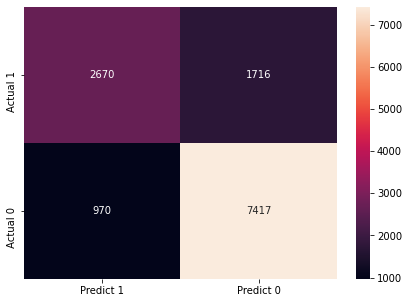

<IPython.core.display.Javascript object>

In [31]:
## Confusion Matrix
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["Actual 1"," Actual 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='g')
plt.show()

# The confusion matrix using Logistic Regression

- True Positives (TP): we correctly predicted that customer cancelled for 2670 bookings.

- True Negatives (TN): we correctly predicted that customer will not cancel 7417

- False Positives (FP): we incorrectly predicted that customer will cancel (a "Type I error") 970 Falsely predicted Type I error.

- False Negatives (FN): we incorrectly predicted that customer will not cancel (a "Type II error") 1718 Falsely predicted negative Type II error.

### Model evaluation criterion

### Model can make wrong predictions as:

1. Predicting a customer will not Cancel the booking but in reality the customer cancelled the booking. - Loss of resources (revenue)

2. Predicting a customer will Cancel the booking but in reality the customer did not cancelled the booking. - Might be loss of future opportunity and reputation.


### Which case is more important? 

* If we predict a customer will not cancel the booking but if a customer will cancel the booking then.

1. Loss of resources (revenue) when the hotel cannot resell the room.
2. Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
3. Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
4. Human resources to make arrangements for the guests.


### How to reduce this loss i.e need to reduce False Negatives?

*  `recall` should be maximized, the greater the recall higher the chances of minimizing the false negatives.



#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
- The model_performance_classification_statsmodels function will be used to check the model performance of models.
- The confusion_matrix_statsmodels function will be used to plot confusion matrix.

In [2]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [3]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [4]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [5]:
# There are different solvers available in Sklearn logistic regression
# The newton-cg solver is faster for high-dimensional data

model = LogisticRegression(solver="newton-cg", random_state=1)
lg = model.fit(X_train, y_train)

NameError: name 'LogisticRegression' is not defined

### Checking performance on training set

In [35]:
# predicting on training set
y_pred_train = lg.predict(X_train)

<IPython.core.display.Javascript object>

In [36]:
print("Training set performance:")
print("Accuracy:", accuracy_score(y_train, y_pred_train))
print("Precision:", precision_score(y_train, y_pred_train))
print("Recall:", recall_score(y_train, y_pred_train))
print("F1:", f1_score(y_train, y_pred_train))

Training set performance:
Accuracy: 0.7929403080226822
Precision: 0.7322695035460993
Recall: 0.6133056133056133
F1: 0.667528689187005


<IPython.core.display.Javascript object>

### Checking performance on test set

In [37]:
# predicting on the test set
y_pred_test = lg.predict(X_test)

<IPython.core.display.Javascript object>

In [38]:
print("Test set performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("Precision:", precision_score(y_test, y_pred_test))
print("Recall:", recall_score(y_test, y_pred_test))
print("F1:", f1_score(y_test, y_pred_test))

Test set performance:
Accuracy: 0.79088702732326
Precision: 0.7357712400329942
Recall: 0.6101231190150479
F1: 0.6670821388508039


<IPython.core.display.Javascript object>

## Observations

- The training and testing recall are 61.3% and 60.98% respectively.
- The training and testing f1_scores are 0.66
- Recall on the train and test sets are comparable.
- f1_score on the train and test sets are comparable.

This shows that the model is giving generalised results.

We have build a logistic regression model which shows good performance on the train and test sets but to identify significant variables we will have to build a logistic regression model using the statsmodels library.
We will now perform logistic regression using statsmodels, a Python module that provides functions for the estimation of many statistical models, as well as for conducting statistical tests, and statistical data exploration.

Using statsmodels, we will be able to check the statistical validity of our model - identify the significant predictors from p-values that we get for each predictor variable.

### Logistic Regression (with statsmodels library)

In [39]:
# adding constant
X = sm.add_constant(X)

# splitting in training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

<IPython.core.display.Javascript object>

In [40]:
# fitting logistic regression model
logit = sm.Logit(y_train, X_train)
lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                29803
Model:                          Logit   Df Residuals:                    29775
Method:                           MLE   Df Model:                           27
Date:                Fri, 17 Sep 2021   Pseudo R-squ.:                  0.3293
Time:                        23:06:12   Log-Likelihood:                -12799.
converged:                      False   LL-Null:                       -19083.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   89.8393     68.737      1.307      0.191     -44.882     224.561
no_of_adults                            -0.0320      

c:\python3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<IPython.core.display.Javascript object>

In [41]:
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.792873,0.613801,0.731822,0.667636


<IPython.core.display.Javascript object>

### Observations

- Negative values of the coefficient shows that probability of customer cancel the booking decreases with the increase of corresponding attribute value.

- Positive values of the coefficient show that that probability of customer cancel the booking increases with the increase of corresponding attribute value.

- p-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant.

- But these variables might contain multicollinearity, which will affect the p-values.

- We will have to remove multicollinearity from the data to get reliable coefficients and p-values.

- There are different ways of detecting (or testing) multi-collinearity, one such way is the Variation Inflation Factor.

### Additional Information on VIF 

Variance Inflation factor: Variance inflation factors measure the inflation in the variances of the regression coefficients estimates due to collinearity that exist among the predictors. It is a measure of how much the variance of the estimated regression coefficient βk is "inflated" by the existence of correlation among the predictor variables in the model.

General Rule of thumb: If VIF is 1 then there is no correlation among the kth predictor and the remaining predictor variables, and hence the variance of β̂k is not inflated at all. Whereas if VIF exceeds 5, we say there is moderate VIF and if it is 10 or exceeding 10, it shows signs of high multi-collinearity. But the purpose of the analysis should dictate which threshold to use.

In [42]:
vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

const                                   1.859314e+07
no_of_adults                            1.449389e+00
no_of_children                          2.075427e+00
no_of_weekend_nights                    1.083180e+00
no_of_week_nights                       1.130019e+00
required_car_parking_space              1.035963e+00
lead_time                               1.331931e+00
arrival_year                            1.797321e+00
arrival_month                           1.547549e+00
arrival_date                            1.004898e+00
no_of_previous_cancellations            1.509257e+00
no_of_previous_bookings_not_canceled    1.846098e+00
avg_price_per_room                      2.625662e+00
no_of_special_requests                  1.111299e+00
type_of_meal_plan_1                     1.537734e+00
type_of_meal_plan_2                     1.417152e+00
type_of_meal_plan_3                     1.028843e+00
room_type_reserved_2                    1.095587e+00
room_type_r

<IPython.core.display.Javascript object>

## None of the variables exhibit high multicollinearity, so the values in the summary are reliable.
- Let's remove the insignificant features (p-value>0.05).


In [43]:
# running a loop to drop variables with high p-value

# initial list of columns
cols = X_train.columns.tolist()


# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    X_train_aux = X_train[cols]

    # fitting the model
    model = sm.Logit(y_train, X_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

c:\python3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\python3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


['no_of_children', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_1', 'type_of_meal_plan_2', 'room_type_reserved_4', 'room_type_reserved_5', 'room_type_reserved_6', 'room_type_reserved_7', 'market_segment_type_1', 'market_segment_type_2', 'market_segment_type_4', 'repeated_guest_1']


<IPython.core.display.Javascript object>

In [44]:
X_train1 = X_train[selected_features]

<IPython.core.display.Javascript object>

In [45]:
logit1 = sm.Logit(y_train, X_train1.astype(float))
lg1 = logit1.fit(disp=False)
print(lg1.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                29803
Model:                          Logit   Df Residuals:                    29784
Method:                           MLE   Df Model:                           18
Date:                Fri, 17 Sep 2021   Pseudo R-squ.:                  0.3288
Time:                        23:06:18   Log-Likelihood:                -12808.
converged:                       True   LL-Null:                       -19083.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
no_of_children                   0.1058      0.046      2.316      0.021       0.016       0.195
no_of_week_nights                0.0778      0.010      7.497      0.000     

<IPython.core.display.Javascript object>

# Observation
- Now no feature has p-value greater than 0.05, so we'll consider the features in X_train1 as the final ones and lg1 as final model.

## Coefficient interpretations
- Coefficient of no_of_children, no_of_week_nights,lead_time,no_of_previous_cancellations,avg_price_per_room,market_segment_type_1, market_segment_type_2, market_segment_type_4 are positive an increase in these will lead  to increase in chances of a person cancelling the bookings. 
- Coefficient of required_car_parking_space,arrival_year,arrival_month, no_of_special_requests,type_of_meal_plan, room_type_reserved and repeated_guest are negative and an increase in these will lead to decrease in chances of a person  cancelling booking 


### Converting coefficients to odds
- The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients.
- Therefore, odds = exp(b)
- The percentage change in odds is given as odds = (exp(b) - 1) * 100


In [46]:
# converting coefficients to odds
odds = np.exp(lg1.params)

# finding the percentage change
perc_change_odds = (np.exp(lg1.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train1.columns).T

,no_of_children,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,no_of_previous_cancellations,avg_price_per_room,no_of_special_requests,type_of_meal_plan_1,type_of_meal_plan_2,room_type_reserved_4,room_type_reserved_5,room_type_reserved_6,room_type_reserved_7,market_segment_type_1,market_segment_type_2,market_segment_type_4,repeated_guest_1
Odds,1.111581,1.080912,0.220939,1.016818,0.997719,0.964226,1.247456,1.016518,0.274575,0.705548,0.611091,0.876876,0.752406,0.623281,0.489865,9.257889,5.064443,7.457506,0.045797
Change_odd%,11.158149,8.091169,-77.906106,1.681840,-0.228111,-3.577365,24.745623,1.651829,-72.542495,-29.445249,-38.890869,-12.312411,-24.759400,-37.671928,-51.013524,825.788920,406.444306,645.750601,-95.420262


<IPython.core.display.Javascript object>

### Coefficient interpretations

- arrival_year: Holding all other feature constant a unit change in the arrival_year will decrease the odds of the customer will cancel the booking by 0.99 times or 2.28% decrease in odds.
- Online booking has more odds of cancellation of booking with 9.2 times or 82.5% increase in odds. 



# Checking model performance on the training set

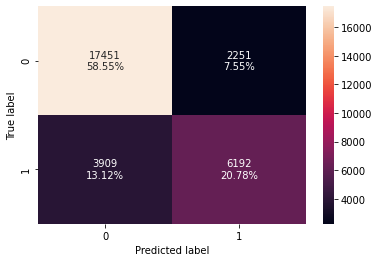

<IPython.core.display.Javascript object>

In [47]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_train1, y_train)

In [48]:
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lg1, X_train1, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.793309,0.613009,0.733389,0.667817


<IPython.core.display.Javascript object>

# ROC-AUC
ROC-AUC on training set

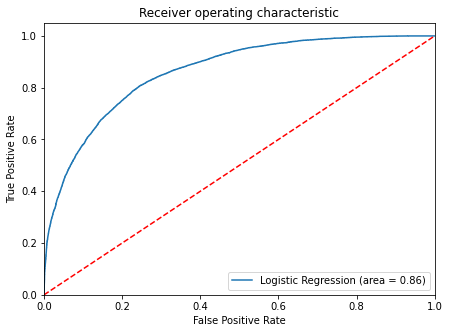

<IPython.core.display.Javascript object>

In [49]:
logit_roc_auc_train = roc_auc_score(y_train, lg1.predict(X_train1)) 
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

### Logistic Regression model is giving a good performance on training set.

# Model Performance Improvement
Let's see if the f1 score can be improved further, by changing the model threshold using AUC-ROC Curve

### Optimal threshold using AUC-ROC curve

In [50]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.3084980359975222


<IPython.core.display.Javascript object>

### Checking model performance on training set

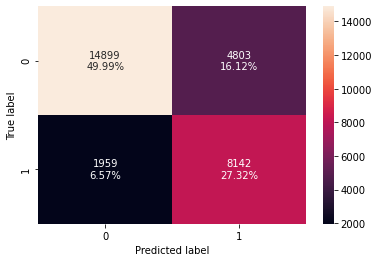

<IPython.core.display.Javascript object>

In [51]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_auc_roc
)

In [52]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.77311,0.806059,0.628969,0.706587


<IPython.core.display.Javascript object>

- Model performance has improved significantly.
- Model is giving a recall of 0.80 as compared to initial model which was giving a recall of 0.61.
- Model is giving a f1 score of 0.70 as compared to initial model which was giving a f1 score of 0.66.
- Precision has decreased from 0.73 to 0.62.

### Let's use Precision-Recall curve and see if we can find a better threshold

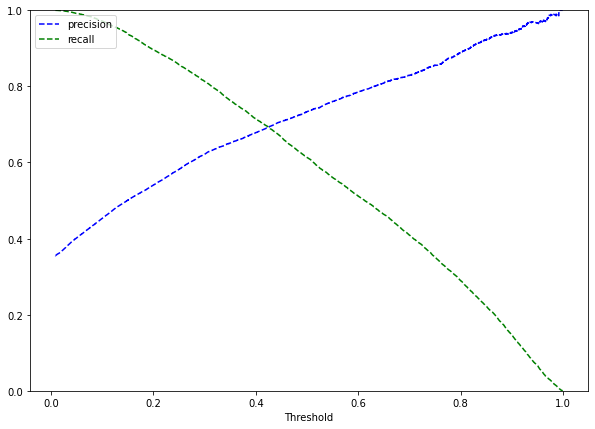

<IPython.core.display.Javascript object>

In [53]:
y_scores = lg1.predict(X_train1)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

### At threshold around 0.41 we get balanced recall and precision.

In [54]:
# setting the threshold
optimal_threshold_curve = 0.41

<IPython.core.display.Javascript object>

### Checking model performance on training set

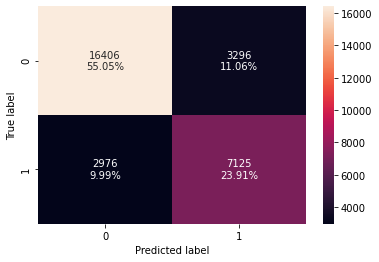

<IPython.core.display.Javascript object>

In [55]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_train1, y_train, threshold=optimal_threshold_curve)

In [56]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.789551,0.705376,0.683716,0.694377


<IPython.core.display.Javascript object>

Model is performing ok on training set.
There's not much improvement in the model performance on the default threshold of 0.41 the optimal threshold.

# Model Performance Summary

In [57]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.30 Threshold",
    "Logistic Regression-0.41 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression sklearn,Logistic Regression-0.30 Threshold,Logistic Regression-0.41 Threshold
Accuracy,0.793309,0.773110,0.789551
Recall,0.613009,0.806059,0.705376
Precision,0.733389,0.628969,0.683716
F1,0.667817,0.706587,0.694377


<IPython.core.display.Javascript object>

# Let's check the performance on the test set

In [58]:
X_test1 = X_test[list(X_train1.columns)]

<IPython.core.display.Javascript object>

# Using model with default threshold


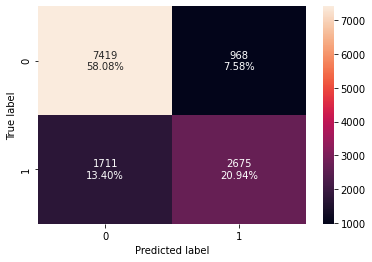

<IPython.core.display.Javascript object>

In [59]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test1, y_test)

In [60]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg1, X_test1, y_test
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.790261,0.609895,0.734285,0.666335


<IPython.core.display.Javascript object>

### ROC curve on test set

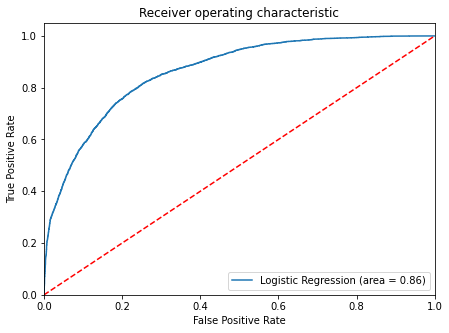

<IPython.core.display.Javascript object>

In [61]:
logit_roc_auc_train = roc_auc_score(y_test, lg1.predict(X_test1))
fpr, tpr, thresholds = roc_curve(y_test, lg1.predict(X_test1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

**Using model with optimal threshold** 

In [62]:
optimal_threshold_auc_roc

0.3084980359975222

<IPython.core.display.Javascript object>

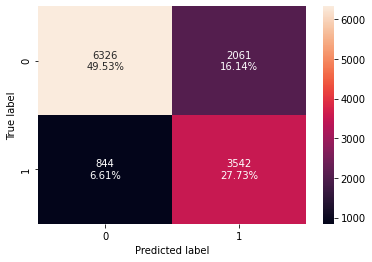

<IPython.core.display.Javascript object>

In [63]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test1, y_test, threshold=optimal_threshold_auc_roc)

In [64]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_test1, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


,Accuracy,Recall,Precision,F1
0,0.772567,0.80757,0.632161,0.70918


<IPython.core.display.Javascript object>

**Using model with threshold = 0.41**

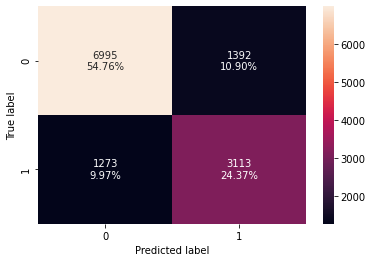

<IPython.core.display.Javascript object>

In [65]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test1, y_test, threshold=optimal_threshold_curve)


In [66]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_test1, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve


Test performance:


,Accuracy,Recall,Precision,F1
0,0.791357,0.709758,0.69101,0.700259


<IPython.core.display.Javascript object>

# Model performance summary

In [67]:
# training performance comparison

# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.30 with Threshold",
    "Logistic Regression-0.41 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression sklearn,Logistic Regression-0.30 with Threshold,Logistic Regression-0.41 Threshold
Accuracy,0.793309,0.773110,0.789551
Recall,0.613009,0.806059,0.705376
Precision,0.733389,0.628969,0.683716
F1,0.667817,0.706587,0.694377


<IPython.core.display.Javascript object>

In [88]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.30 Threshold",
    "Logistic Regression-0.41 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Logistic Regression sklearn,Logistic Regression-0.30 Threshold,Logistic Regression-0.41 Threshold
Accuracy,0.790261,0.772567,0.791357
Recall,0.609895,0.807570,0.709758
Precision,0.734285,0.632161,0.691010
F1,0.666335,0.709180,0.700259


<IPython.core.display.Javascript object>

### Conclusion

- All the models are giving a generalized performance on training and test set.
- The highest recall is 80% on the training set.
- Using the model with default threshold the model will give a low recall but good precision scores - This model will help the hotel save resources but lose on potential customers.
- Using the model with 0.30 threshold the model will give a high recall but low precision scores - This model will help the hotel identify potential cancellations effectively but the cost of resources will be high.
- Using the model with 0.41 threshold the model will give a balance recall and precision score - This model will help the hotel to maintain a balance in identifying potential customer and the cost of resources.

## Recommendations

- Coefficient of no_of_children, no_of_week_nights,lead_time,no_of_previous_cancellations,avg_price_per_room,market_segment_type_1, market_segment_type_2, market_segment_type_4 are positive an increase in these will lead to increase in chances of a person cancelling the bookings.
- Coefficient of required_car_parking_space,arrival_year,arrival_month, no_of_special_requests,type_of_meal_plan, room_type_reserved and repeated_guest are negative and an increase in these will lead to decrease in chances of a person cancelling booking



# Build Decision Tree Model and visualizing the Decision Tree

In [111]:
dbTree = booking.copy()

<IPython.core.display.Javascript object>

In [112]:
dbTree.shape

(42576, 28)

<IPython.core.display.Javascript object>

In [114]:
dbTree.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,type_of_meal_plan_1,type_of_meal_plan_2,type_of_meal_plan_3,room_type_reserved_2,room_type_reserved_3,room_type_reserved_4,room_type_reserved_5,room_type_reserved_6,room_type_reserved_7,market_segment_type_1,market_segment_type_2,market_segment_type_3,market_segment_type_4,repeated_guest_1
0,2,0,1,2,0,224,2017,10,2,0,0,65.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,2,3,0,5,2018,11,6,0,0,106.68,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1,0,2,1,0,1,2018,2,28,0,0,60.00,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,2,0,0,2,0,211,2018,5,20,0,0,100.00,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,3,0,0,3,0,277,2019,7,13,0,0,89.10,2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


<IPython.core.display.Javascript object>

In [115]:
feature_names = list(X.columns)
print(feature_names)

['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_1', 'type_of_meal_plan_2', 'type_of_meal_plan_3', 'room_type_reserved_2', 'room_type_reserved_3', 'room_type_reserved_4', 'room_type_reserved_5', 'room_type_reserved_6', 'room_type_reserved_7', 'market_segment_type_1', 'market_segment_type_2', 'market_segment_type_3', 'market_segment_type_4', 'repeated_guest_1']


<IPython.core.display.Javascript object>

In [116]:
## spliting the data into train and test.
from sklearn.model_selection import train_test_split

X = dbTree.drop("booking_status", axis=1)  # Predictor feature columns
y = dbTree["booking_status"]  # Predicted class (1=Cancelled, 0=Not Cancelled)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
# 1 is just any random seed number
print(X_train.shape, X_test.shape)
X_train.head(10)

(29803, 27) (12773, 27)


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,type_of_meal_plan_1,type_of_meal_plan_2,type_of_meal_plan_3,room_type_reserved_2,room_type_reserved_3,room_type_reserved_4,room_type_reserved_5,room_type_reserved_6,room_type_reserved_7,market_segment_type_1,market_segment_type_2,market_segment_type_3,market_segment_type_4,repeated_guest_1
52247,1,0,0,2,0,15,2018,1,26,0,0,80.00,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
8414,1,0,1,0,0,18,2018,2,21,0,0,80.00,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0
44196,3,0,0,2,0,211,2018,10,7,0,0,224.10,2,0,1,0,0,0,0,1,0,0,1,0,0,0,0
28535,1,0,2,1,0,110,2017,7,25,0,0,36.25,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
18280,3,0,0,3,0,54,2018,4,20,0,0,130.05,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
12947,3,0,1,1,0,159,2019,8,7,0,0,184.50,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
24499,2,0,0,2,0,35,2018,10,7,0,0,157.50,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0
42274,3,0,1,3,0,26,2018,9,5,0,0,127.20,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
44528,2,0,0,3,0,19,2019,2,14,0,0,80.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
39783,2,0,0,4,0,42,2018,11,2,0,0,91.80,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0


<IPython.core.display.Javascript object>

In [117]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

<IPython.core.display.Javascript object>

In [118]:
def get_recall_score(model):
    """
    model : classifier to predict values of X

    """
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Recall on training set : ", metrics.recall_score(y_train, pred_train))
    print("Recall on test set : ", metrics.recall_score(y_test, pred_test))

<IPython.core.display.Javascript object>

In [119]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

<IPython.core.display.Javascript object>

## Scoring our Decision Tree

In [120]:
print("Accuracy on training set : ",dTree.score(X_train, y_train))
print("Accuracy on test set : ",dTree.score(X_test, y_test))
# Recall on train and test
get_recall_score(dTree)

Accuracy on training set :  0.9967117404288159
Accuracy on test set :  0.7900258357472795
Recall on training set :  0.9902979902979903
Recall on test set :  0.6917464660282717


<IPython.core.display.Javascript object>

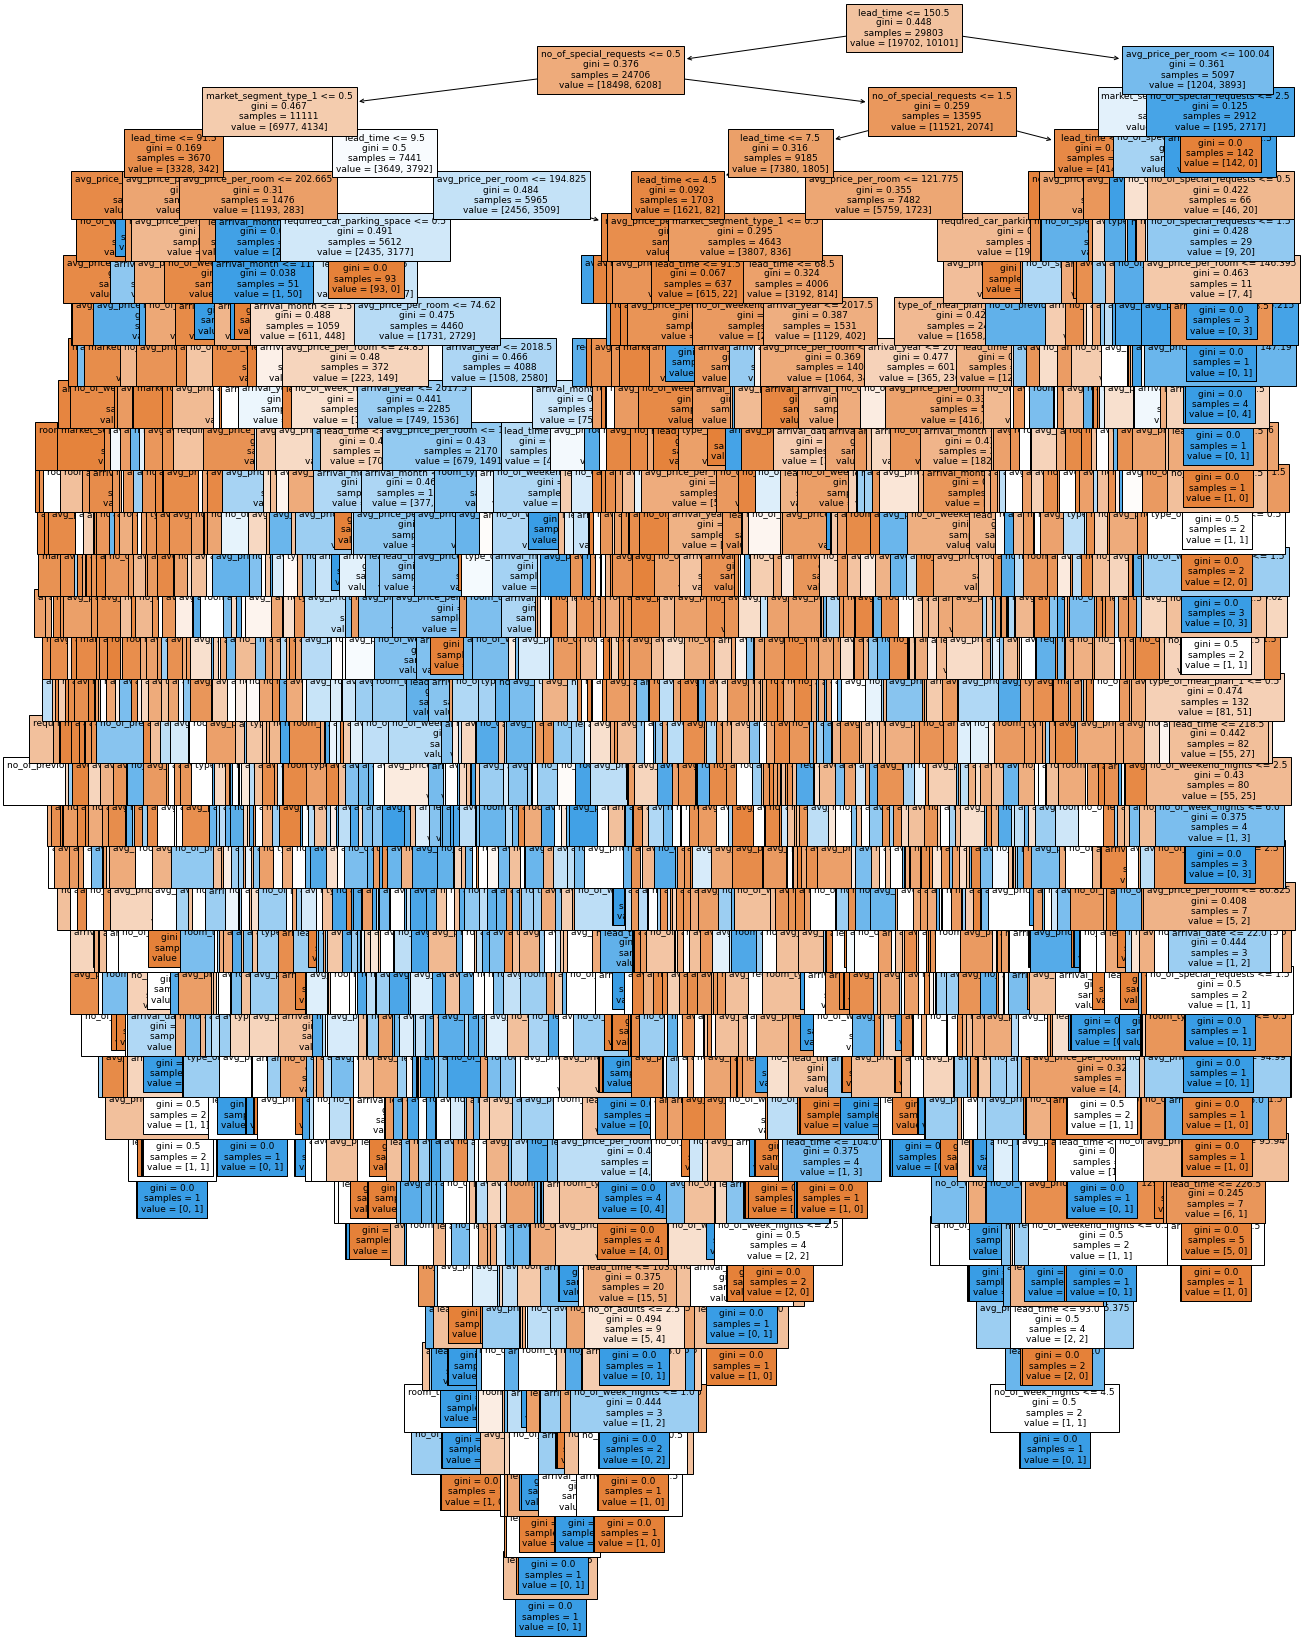

<IPython.core.display.Javascript object>

In [121]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    dTree,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [123]:
# Text report showing the rules of a decision tree -

print(tree.export_text(dTree, feature_names=feature_names, show_weights=True))

|--- lead_time <= 150.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_1 <= 0.50
|   |   |   |--- lead_time <= 91.50
|   |   |   |   |--- avg_price_per_room <= 209.28
|   |   |   |   |   |--- no_of_weekend_nights <= 3.50
|   |   |   |   |   |   |--- avg_price_per_room <= 75.54
|   |   |   |   |   |   |   |--- arrival_month <= 9.50
|   |   |   |   |   |   |   |   |--- lead_time <= 17.50
|   |   |   |   |   |   |   |   |   |--- arrival_month <= 6.50
|   |   |   |   |   |   |   |   |   |   |--- room_type_reserved_4 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 7
|   |   |   |   |   |   |   |   |   |   |--- room_type_reserved_4 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- arrival_month >  6.50
|   |   |   |   |   |   |   |   |   |   |--- no_of_children <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 9
|   |   |  

<IPython.core.display.Javascript object>

In [124]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )
print (pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                           Imp
lead_time                             0.349126
avg_price_per_room                    0.157117
no_of_special_requests                0.097675
arrival_date                          0.094488
market_segment_type_1                 0.077974
arrival_month                         0.061045
no_of_week_nights                     0.051164
no_of_weekend_nights                  0.033160
arrival_year                          0.017725
no_of_adults                          0.017309
type_of_meal_plan_1                   0.010617
room_type_reserved_4                  0.009037
required_car_parking_space            0.007455
no_of_children                        0.005740
room_type_reserved_5                  0.002921
type_of_meal_plan_2                   0.002301
room_type_reserved_2                  0.001702
room_type_reserved_6                  0.001015
market_segment_type_2                 0.000548
room_type_reserved_7                  0.000480
market_segmen

<IPython.core.display.Javascript object>

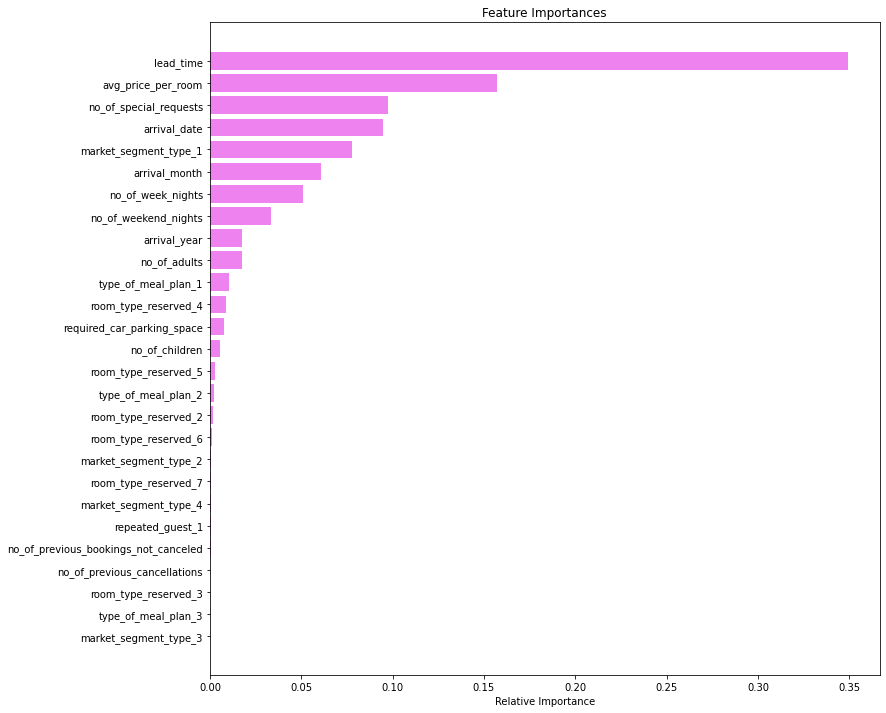

<IPython.core.display.Javascript object>

In [125]:
importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

According to the decision tree model, lead_time is the most important variable for predicting the customer booking cancellation .
The tree above is very complex, such a tree often overfits.

### Reducing over fitting
In general, the deeper you allow your tree to grow, the more complex your model will become because you will have more splits and it captures more information about the data and this is one of the root causes of overfitting
Let's try Limiting the max_depth of tree to 3

# Decision Tree (Pre-pruning with max depth 3)

In [126]:
dTree1 = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=1)
dTree1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

<IPython.core.display.Javascript object>

In [127]:
# Checking number of positives
y.sum(axis=0)

14487

<IPython.core.display.Javascript object>

## Confusion Matrix - decision tree with depth restricted to 3

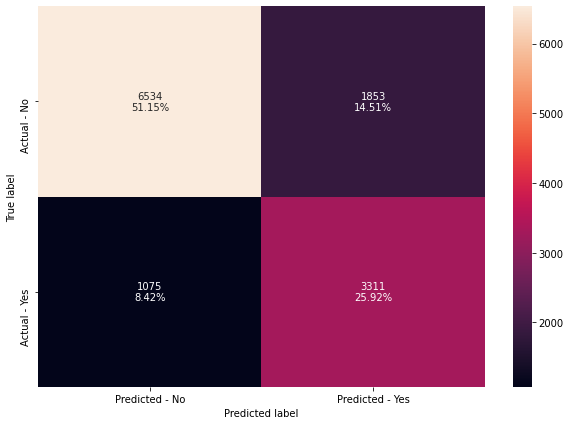

<IPython.core.display.Javascript object>

In [128]:
make_confusion_matrix(dTree1, y_test)

In [129]:
print("Accuracy on training set : ", dTree1.score(X_train, y_train))
print("Accuracy on test set : ", dTree1.score(X_test, y_test))
get_recall_score(dTree1)

Accuracy on training set :  0.7710968694426735
Accuracy on test set :  0.7707664605026228
Recall on training set :  0.7480447480447481
Recall on test set :  0.7549019607843137


<IPython.core.display.Javascript object>

**Recall on training set has reduced from 0.99 to 0.75 so we can say that this is an improvement because now the model is not overfitting and we have a generalized model.**

In [130]:
feature_names = list(X.columns)
print(feature_names)

['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_1', 'type_of_meal_plan_2', 'type_of_meal_plan_3', 'room_type_reserved_2', 'room_type_reserved_3', 'room_type_reserved_4', 'room_type_reserved_5', 'room_type_reserved_6', 'room_type_reserved_7', 'market_segment_type_1', 'market_segment_type_2', 'market_segment_type_3', 'market_segment_type_4', 'repeated_guest_1']


<IPython.core.display.Javascript object>

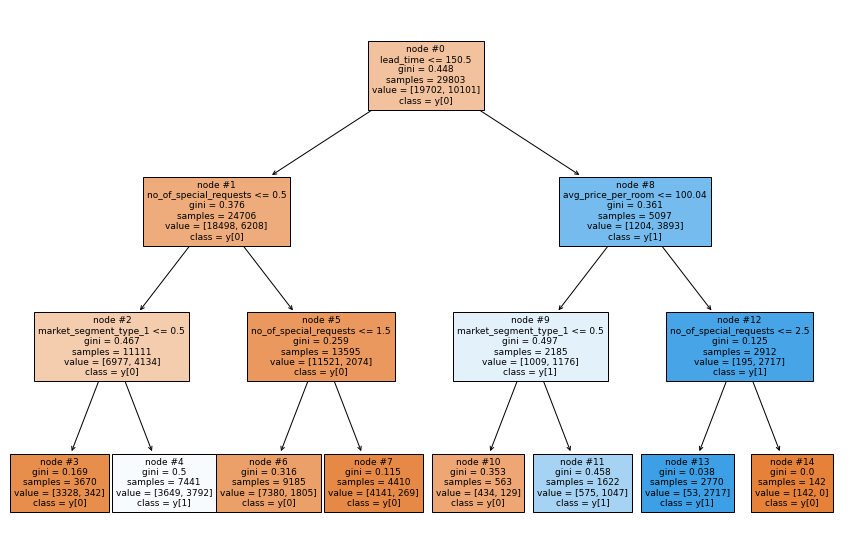

<IPython.core.display.Javascript object>

In [131]:
plt.figure(figsize=(15, 10))

tree.plot_tree(
    dTree1,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

In [132]:
print(tree.export_text(dTree1, feature_names=feature_names, show_weights=True))

|--- lead_time <= 150.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_1 <= 0.50
|   |   |   |--- weights: [3328.00, 342.00] class: 0
|   |   |--- market_segment_type_1 >  0.50
|   |   |   |--- weights: [3649.00, 3792.00] class: 1
|   |--- no_of_special_requests >  0.50
|   |   |--- no_of_special_requests <= 1.50
|   |   |   |--- weights: [7380.00, 1805.00] class: 0
|   |   |--- no_of_special_requests >  1.50
|   |   |   |--- weights: [4141.00, 269.00] class: 0
|--- lead_time >  150.50
|   |--- avg_price_per_room <= 100.04
|   |   |--- market_segment_type_1 <= 0.50
|   |   |   |--- weights: [434.00, 129.00] class: 0
|   |   |--- market_segment_type_1 >  0.50
|   |   |   |--- weights: [575.00, 1047.00] class: 1
|   |--- avg_price_per_room >  100.04
|   |   |--- no_of_special_requests <= 2.50
|   |   |   |--- weights: [53.00, 2717.00] class: 1
|   |   |--- no_of_special_requests >  2.50
|   |   |   |--- weights: [142.00, 0.00] class: 0



<IPython.core.display.Javascript object>

**The tree has become readable now but the recall on test set has not improved.**

In [133]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        dTree1.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                           Imp
lead_time                             0.486268
market_segment_type_1                 0.218481
no_of_special_requests                0.209991
avg_price_per_room                    0.085260
no_of_adults                          0.000000
type_of_meal_plan_3                   0.000000
market_segment_type_4                 0.000000
market_segment_type_3                 0.000000
market_segment_type_2                 0.000000
room_type_reserved_7                  0.000000
room_type_reserved_6                  0.000000
room_type_reserved_5                  0.000000
room_type_reserved_4                  0.000000
room_type_reserved_3                  0.000000
room_type_reserved_2                  0.000000
type_of_meal_plan_1                   0.000000
type_of_meal_plan_2                   0.000000
no_of_children                        0.000000
no_of_previous_bookings_not_canceled  0.000000
no_of_previous_cancellations          0.000000
arrival_date 

<IPython.core.display.Javascript object>

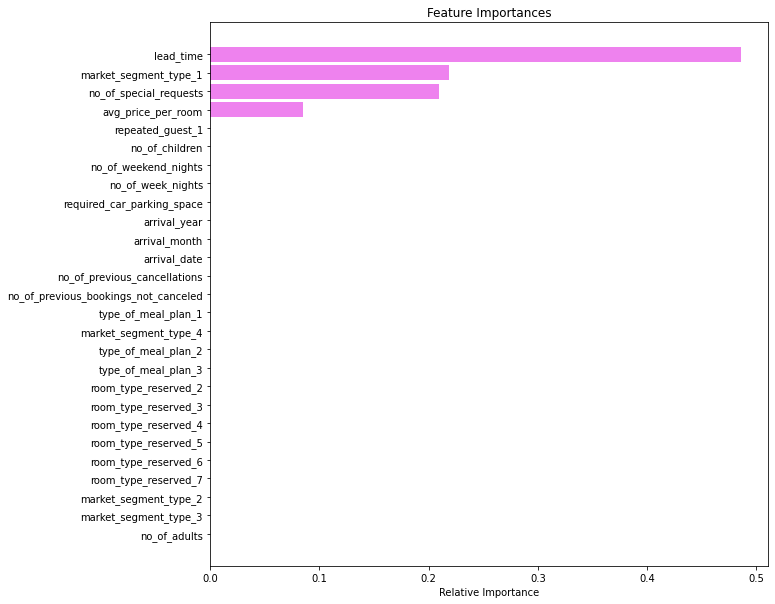

<IPython.core.display.Javascript object>

In [134]:
importances = dTree1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 10))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

# Decision tree with max depth 5

In [135]:
dTree2 = DecisionTreeClassifier(criterion="gini", max_depth=5, random_state=1)
dTree2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=1)

<IPython.core.display.Javascript object>

In [136]:
print("Accuracy on training set : ", dTree2.score(X_train, y_train))
print("Accuracy on test set : ", dTree2.score(X_test, y_test))
get_recall_score(dTree2)

Accuracy on training set :  0.814548870919035
Accuracy on test set :  0.8167227746026775
Recall on training set :  0.7101277101277101
Recall on test set :  0.7179662562699498


<IPython.core.display.Javascript object>

- Recall has been improved on both training and test data.

In [137]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        dTree2.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                           Imp
lead_time                             0.483127
no_of_special_requests                0.206572
market_segment_type_1                 0.171790
avg_price_per_room                    0.114291
arrival_month                         0.011751
no_of_weekend_nights                  0.010245
no_of_week_nights                     0.002224
no_of_adults                          0.000000
room_type_reserved_3                  0.000000
market_segment_type_4                 0.000000
market_segment_type_3                 0.000000
market_segment_type_2                 0.000000
room_type_reserved_7                  0.000000
room_type_reserved_6                  0.000000
room_type_reserved_5                  0.000000
room_type_reserved_4                  0.000000
type_of_meal_plan_1                   0.000000
room_type_reserved_2                  0.000000
type_of_meal_plan_3                   0.000000
type_of_meal_plan_2                   0.000000
no_of_childre

<IPython.core.display.Javascript object>

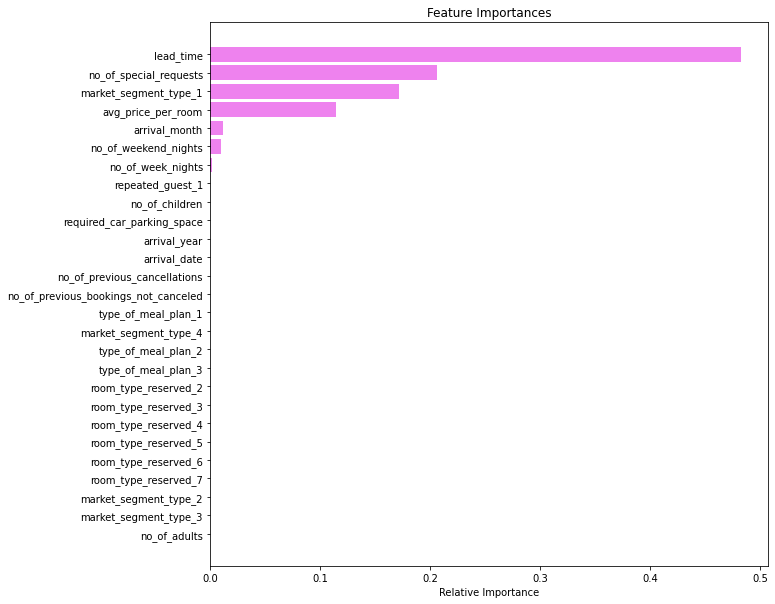

<IPython.core.display.Javascript object>

In [138]:
importances = dTree2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 10))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### Since recall value has gone down when compared to the prepruned tree with max depth 3, we would not like to consider this model

# Cost Complexity Pruning

The DecisionTreeClassifier provides parameters such as min_samples_leaf and max_depth to prevent a tree from overfiting. Cost complexity pruning provides another option to control the size of a tree. In DecisionTreeClassifier, this pruning technique is parameterized by the cost complexity parameter, ccp_alpha. Greater values of ccp_alpha increase the number of nodes pruned. Here we only show the effect of ccp_alpha on regularizing the trees and how to choose a ccp_alpha based on validation scores.

Minimal cost complexity pruning recursively finds the node with the "weakest link". The weakest link is characterized by an effective alpha, where the nodes with the smallest effective alpha are pruned first. To get an idea of what values of ccp_alpha could be appropriate, scikit-learn provides DecisionTreeClassifier.cost_complexity_pruning_path that returns the effective alphas and the corresponding total leaf impurities at each step of the pruning process. As alpha increases, more of the tree is pruned, which increases the total impurity of its leaves.

## Total impurity of leaves vs effective alphas of pruned tree

In [139]:
clf = DecisionTreeClassifier(random_state=1, )
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

<IPython.core.display.Javascript object>

In [140]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.003288
1,0.000000,0.003288
2,0.000000,0.003288
3,0.000000,0.003288
4,0.000000,0.003288
...,...,...
1997,0.008721,0.299718
1998,0.012485,0.312203
1999,0.013059,0.325262
2000,0.024185,0.373632


<IPython.core.display.Javascript object>

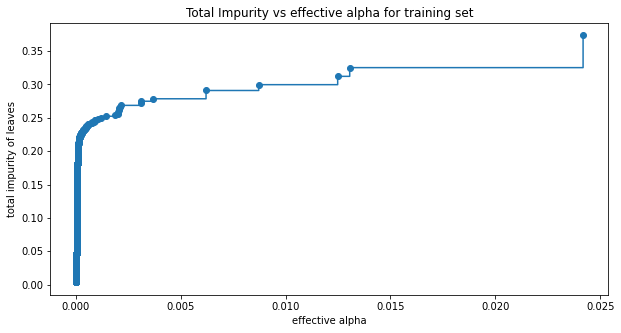

<IPython.core.display.Javascript object>

In [141]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree, clfs[-1], with one node.

In [160]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 3 with ccp_alpha: 0.02418526656603248


<IPython.core.display.Javascript object>

For the remainder, we remove the last element in clfs and ccp_alphas, because it is the trivial tree with only one node. Here we show that the number of nodes and tree depth decreases as alpha increases.

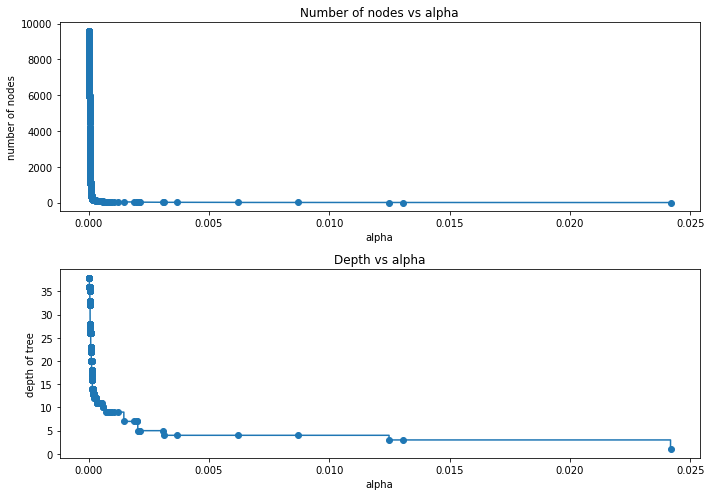

<IPython.core.display.Javascript object>

In [143]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [161]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

<IPython.core.display.Javascript object>

In [162]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

<IPython.core.display.Javascript object>

In [146]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

<IPython.core.display.Javascript object>

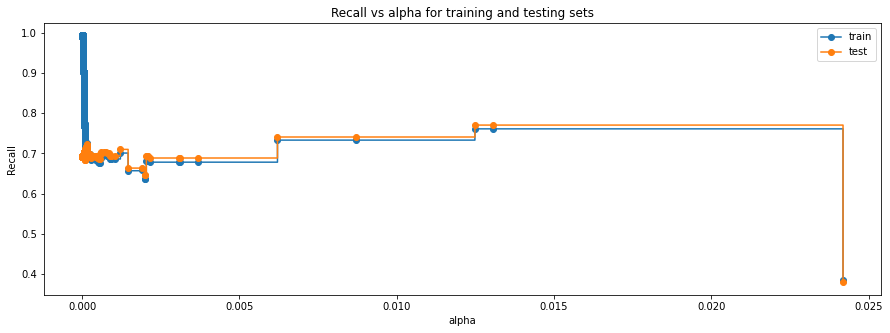

<IPython.core.display.Javascript object>

In [147]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [148]:
# creating the model where we get highest train and test recall

index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)
print("Training accuracy of best model: ", best_model.score(X_train, y_train))
print("Test accuracy of best model: ", best_model.score(X_test, y_test))

DecisionTreeClassifier(ccp_alpha=0.012485002220168628, random_state=1)
Training accuracy of best model:  0.7560983793577828
Test accuracy of best model:  0.755734752994598


<IPython.core.display.Javascript object>

In [149]:
best_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.012485002220168628, random_state=1)

<IPython.core.display.Javascript object>

In [150]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("Actual label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

In [151]:
##  Function to calculate recall score
def get_recall_score(model, predictors, target):
    """
    model: classifier
    predictors: independent variables
    target: dependent variable
    
    """
    prediction = model.predict(predictors)
    return recall_score(target, prediction)

<IPython.core.display.Javascript object>

**Checking performance on training set**

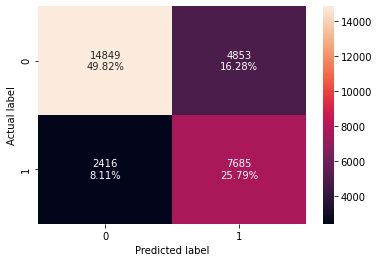

<IPython.core.display.Javascript object>

In [152]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [153]:
print("Recall Score:", get_recall_score(best_model, X_train, y_train))

Recall Score: 0.7608157608157609


<IPython.core.display.Javascript object>

**Checking performance on test set**

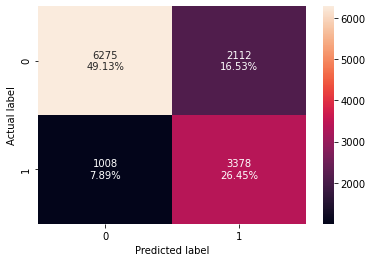

<IPython.core.display.Javascript object>

In [154]:

confusion_matrix_sklearn(best_model, X_test, y_test)

In [155]:
print("Recall Score:", get_recall_score(best_model, X_test, y_test))

Recall Score: 0.7701778385772914


<IPython.core.display.Javascript object>

### Visualizing the Decision Tree

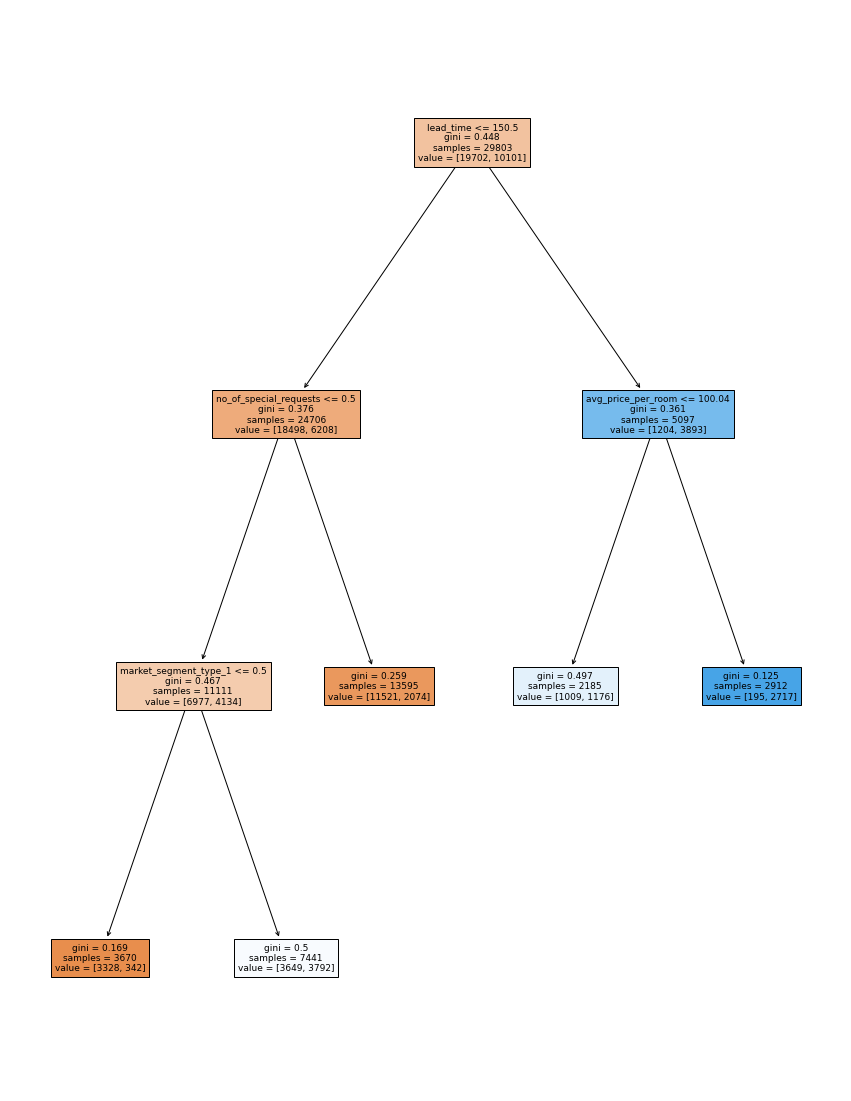

<IPython.core.display.Javascript object>

In [156]:
plt.figure(figsize=(15, 20))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [157]:
print(
    pd.DataFrame(
        best_model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                           Imp
lead_time                             0.548006
market_segment_type_1                 0.210444
no_of_special_requests                0.145464
avg_price_per_room                    0.096085
no_of_adults                          0.000000
type_of_meal_plan_3                   0.000000
market_segment_type_4                 0.000000
market_segment_type_3                 0.000000
market_segment_type_2                 0.000000
room_type_reserved_7                  0.000000
room_type_reserved_6                  0.000000
room_type_reserved_5                  0.000000
room_type_reserved_4                  0.000000
room_type_reserved_3                  0.000000
room_type_reserved_2                  0.000000
type_of_meal_plan_1                   0.000000
type_of_meal_plan_2                   0.000000
no_of_children                        0.000000
no_of_previous_bookings_not_canceled  0.000000
no_of_previous_cancellations          0.000000
arrival_date 

<IPython.core.display.Javascript object>

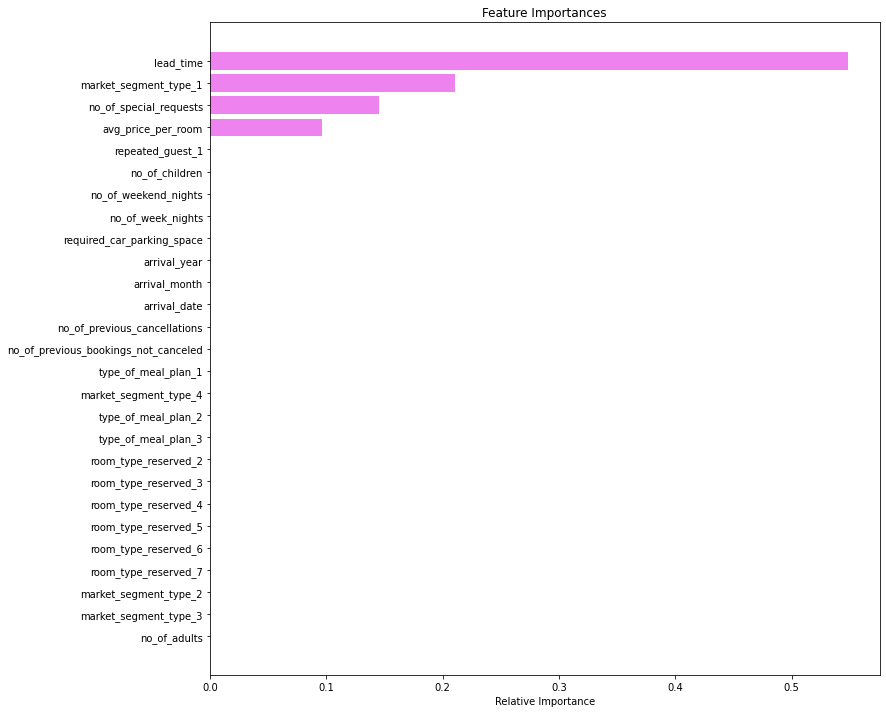

<IPython.core.display.Javascript object>

In [158]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Comparing all the decision tree models

In [159]:
comparison_frame = pd.DataFrame({
    'Model':[
            'Initial decision tree model',
            'Decision tree with restricted maximum depth',
            'Decision treee with hyperparameter tuning'
            ], 
    'Train_Recall':[
        0.74,
        0.71,
        0.76
        ], 
    'Test_Recall':[
        0.75,
        0.71,
        0.77
    ]
}) 
comparison_frame

,Model,Train_Recall,Test_Recall
0,Initial decision tree model,0.74,0.75
1,Decision tree with restricted maximum depth,0.71,0.71
2,Decision treee with hyperparameter tuning,0.76,0.77


<IPython.core.display.Javascript object>

### Conclusion
- We analyzed the "StarHotels Group" booking data using different techniques and used Decision Tree Classifier to build a predictive model for the same.
- The model built can be used to predict if a customer is going to cancel the booking or not.
- We visualized different trees and their confusion matrix to get a better understanding of the model. Easy interpretation is one of the key benefits of Decision Trees.
- We observed the fact that much lesser data preparation is needed for Decision Trees and such a simple model gave good results even with no outliers treatment which shows the robustness of Decision Trees.
- Lead Time, Market Segment Type, Avg Price per room, and No_Of_Special Requests are the most important variable in predicting the customers cancellation behavior
- We established the importance of hyper-parameters/ pruning to reduce overfitting
- We can make observations such as below from the decision tree that gives us an indication of kind of bookings we need to observe:

(a) Lead Time > 9.5 and lead_time <= 150.50 , no_of_special_requests <= 0.50 , market_segment_type_1 > 0.50, then the person is more likely to cancel
(b) If lead_time > 150.50 but avg_price_per_room <= 100.04, customer has a higher chance of cancelling
(c) Similarly if lead_time > 150.50 and even if avg_price_per_room > 100.04, if the customer has lesser special requests than 2.5, Then the customer is very likely to cancel.




### Recommendations

Recommendations
According to the decision tree model -

a) Customer booking Lead Time is one of the most important variable to determine the cancellation odds i.e. if the customer will be cancelling the booking

b) Market_Segment_Type is another important field for determining the customer cancellation trend

c) Avg_Price Per room is indicated by more than one tree models as an important field for determining the customer cancellation trend

d) No_Of_Special Request is a factor in determining the customer cancellation trend

Lead Time is a key indicator . Stat Hotel can run marketing schemes to incentivize customers to book in advance along with special offers and requests to lock the booking and make them aware through channels to ensure that they are more engaged and less likely to cancel

It is observed that 36% guests had special requests and were less likely to cancel the bookings. This depicts clear trend across Customers who do adequate planning with room details are less likely to cancel. Star Hotel can engage with the customers and increase this data collection resulting in deeper engagement



Repeat guests % is lower (3.1%) but they were least likely to cancel. Star Hotel should incentivize customers with schemes for Repeat guests as it may improve the non-cancellation trends